#  Q-learning

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Саттон Р.	С.,	Барто Э. Дж. Обучение с подкреплением: Введение. 2-е изд.
* https://gymnasium.farama.org/tutorials/training_agents/blackjack_tutorial/
* https://en.wikipedia.org/wiki/Q-learning
* https://www.baeldung.com/cs/epsilon-greedy-q-learning
* https://pythonprogramming.net/q-learning-reinforcement-learning-python-tutorial/
* https://www.datacamp.com/tutorial/introduction-q-learning-beginner-tutorial
* https://rubikscode.net/2021/07/20/introduction-to-double-q-learning/
* https://gymnasium.farama.org/api/wrappers/misc_wrappers/#gymnasium.wrappers.RecordVideo

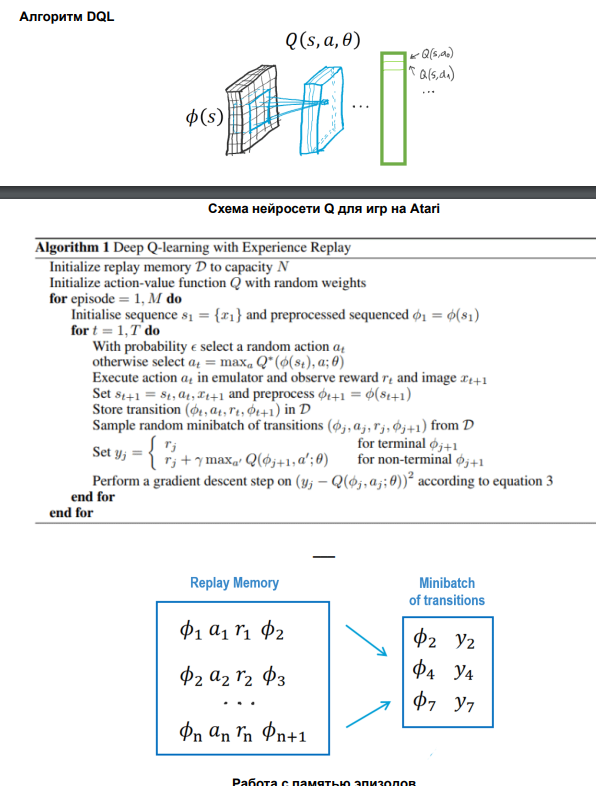

## Задачи для совместного разбора

1\. Рассмотрите понятие Q-функции, ее применение для формирования политики агента и способов ее создания.

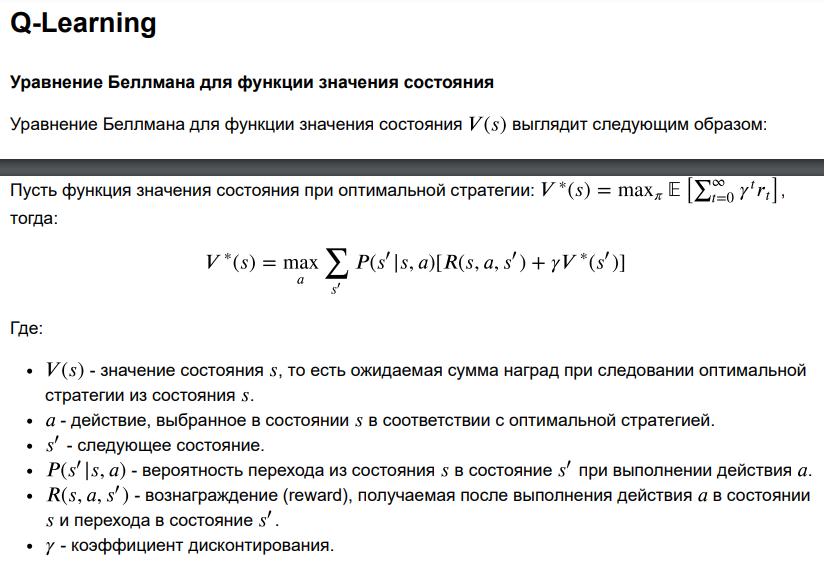

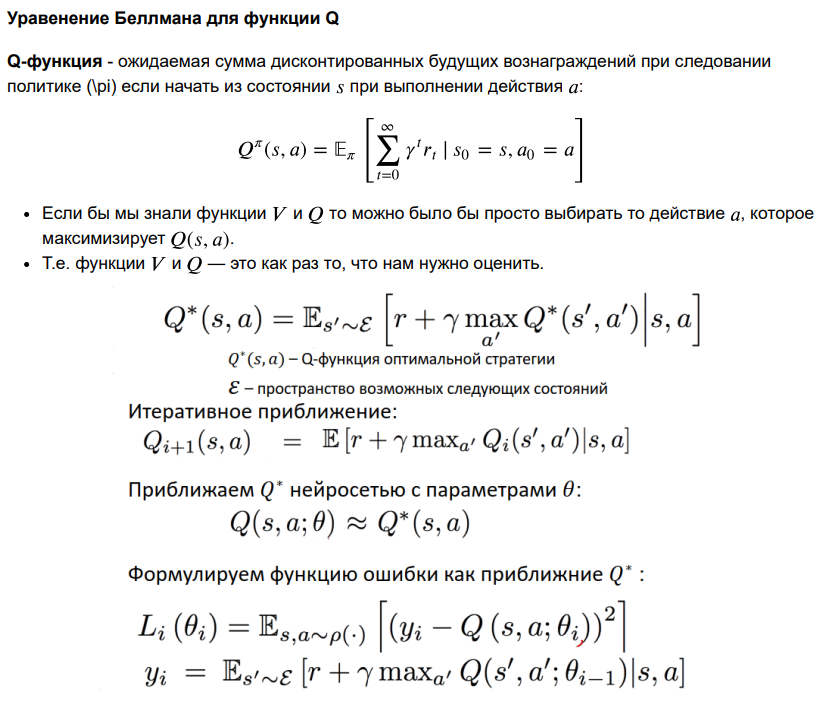


Cтратегия для выбора действия:
$$a_{t+1}(s_t) = argmax_aQ(s_t, a)$$

Правило обновления Q-функции:

![q-learning](https://wikimedia.org/api/rest_v1/media/math/render/svg/d247db9eaad4bd343e7882ec546bf3847ebd36d8)

In [ ]:
!pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 24.5 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

### 1\. Обучите агента для игры в блэкджек (окружение `Blackjack-v1`), используя алгоритм Q-learning. Для создания таблицы Q-функции выясните размеры пространства состояния игры и количество возможных действий игрока и выведите эти значения на экран. Во время обучения несколько раз вычислите статистику за `print_every` последних эпизодов: количество выигранных и проигранных сессий. После завершения обучения визуализируйте полученные данные. Изучите, как выглядит Q-функция (в каких состояниях игрок будет брать карту, в каких - нет). Cыграйте `N=10000` игр, применяя стратегию, выведенную из обученной Q-функции, посчитайте и выведите на экран долю выигранных игр.

Cтратегия для выбора действия:
$$a_{t+1}(s_t) = argmax_aQ(s_t, a)$$

Правило обновления Q-функции:

![q-learning](https://wikimedia.org/api/rest_v1/media/math/render/svg/d247db9eaad4bd343e7882ec546bf3847ebd36d8)

- [ ] Проверено на семинаре

#### Pазмеры пространства состояния игры и количество возможных действий игрока для создания таблицы Q-функции

- Действия: Агент может выбрать одно из двух действий:
  - 1: Хит (взять еще одну карту).
  - 0: Стенд (остановиться и передать ход дилеру).

- Награда: Награды определяются следующим образом:
  - +1, если игрок выиграл.
  - 0, если игра закончилась ничьей.
  - -1, если игрок проиграл.

In [ ]:
import gymnasium as gym

env = gym.make('Blackjack-v1')

# (сумма игрока, карта дилера, есть ли туз)
# 32 возможные суммы (0-31), 11 карт дилера (0-10), 2 состояния туза (0 или 1)
state_space_size = (32, 11, 2)
action_space_size = env.action_space.n  # количество действий (хит или стенд)

print(f"Размеры пространства состояний: {state_space_size}")
print(f"Количество возможных действий: {action_space_size}")

Размеры пространства состояний: (32, 11, 2)
Количество возможных действий: 2


In [ ]:
import numpy as np

Q = np.zeros(state_space_size + (action_space_size,))
Q.size # (32, 11, 2, 2)

1408

state — это список из трёх элементов:

- state[0]: Сумма очков карты игрока.
- state[1]: Значение видимой карты дилера.
- state[2]: Булевое значение, указывающее, есть ли у игрока туз, который может считаться за 11 очков.

In [ ]:
print(env.action_space)
print(env.reset()[0])

Discrete(2)
(13, 2, 0)


In [ ]:
import gymnasium as gym
import numpy as np
from tqdm import tqdm

class Agent:
    def __init__(self, env: gym.Env, config: Config) -> None:
        self.env = env
        self.cfg = config
        self._create_q_table()

    def _create_q_table(self):
        # напишите код для создания таблицы Q-функции
        # для окружения Blackjack должен получиться массив 32x11x2x2
        pass

    def get_action(self, state: np.ndarray) -> int:
        # найдите и верните индекс максимума Q-функции для состояния state
        # обратите внимание, что максимумов может быть несколько
        pass

    def update_q_table(
        self,
        state: np.ndarray | tuple,
        new_state: np.ndarray | tuple,
        reward: float, action: int,
        done: bool
    ) -> None:
        # напишите код для обновления Q-функции согласно правилу выше
        # если эпизод закончен, то будущая награда равна 0
        pass

    def run_episode(self) -> float:
        done = False
        state, info = self.env.reset()
        while not done:
            action = self.get_action(state)
            new_state, reward, terminated, truncated, info = self.env.step(action)
            done = terminated or truncated
            self.update_q_table(state, new_state, reward, action, done)
            state = new_state

            if done:
                return reward


    def train(self):
        # допишите код для сбора статистики
        for ep in tqdm(range(self.cfg.n_episodes)):
            reward = self.run_episode()
        return ep_rewards, stats

  5%|▌         | 5239/100000 [00:02<00:49, 1896.17it/s]

Эпизод 5000: Выигрышей: 1935, Поражений: 2706, Ничьих: 359


 11%|█         | 10520/100000 [00:05<00:35, 2520.90it/s]

Эпизод 10000: Выигрышей: 2103, Поражений: 2528, Ничьих: 369


 16%|█▌        | 15528/100000 [00:07<00:32, 2639.06it/s]

Эпизод 15000: Выигрышей: 2012, Поражений: 2584, Ничьих: 404


 21%|██        | 20584/100000 [00:10<00:20, 3964.36it/s]

Эпизод 20000: Выигрышей: 2024, Поражений: 2551, Ничьих: 425


 26%|██▌       | 26034/100000 [00:10<00:12, 5874.12it/s]

Эпизод 25000: Выигрышей: 2061, Поражений: 2569, Ничьих: 370


 31%|███       | 31026/100000 [00:11<00:11, 5993.47it/s]

Эпизод 30000: Выигрышей: 2022, Поражений: 2618, Ничьих: 360


 36%|███▌      | 36024/100000 [00:12<00:10, 6169.69it/s]

Эпизод 35000: Выигрышей: 2068, Поражений: 2546, Ничьих: 386


 41%|████      | 40990/100000 [00:13<00:10, 5838.59it/s]

Эпизод 40000: Выигрышей: 1998, Поражений: 2587, Ничьих: 415


 46%|████▌     | 45631/100000 [00:14<00:14, 3877.21it/s]

Эпизод 45000: Выигрышей: 2017, Поражений: 2547, Ничьих: 436


 50%|█████     | 50465/100000 [00:15<00:12, 3869.59it/s]

Эпизод 50000: Выигрышей: 2028, Поражений: 2566, Ничьих: 406


 56%|█████▌    | 55811/100000 [00:17<00:08, 5201.54it/s]

Эпизод 55000: Выигрышей: 1958, Поражений: 2625, Ничьих: 417


 61%|██████    | 60674/100000 [00:17<00:06, 5870.41it/s]

Эпизод 60000: Выигрышей: 2036, Поражений: 2541, Ничьих: 423


 66%|██████▌   | 65604/100000 [00:18<00:05, 5823.97it/s]

Эпизод 65000: Выигрышей: 2034, Поражений: 2566, Ничьих: 400


 71%|███████   | 71142/100000 [00:19<00:04, 5980.64it/s]

Эпизод 70000: Выигрышей: 2055, Поражений: 2521, Ничьих: 424


 76%|███████▌  | 76008/100000 [00:20<00:03, 6067.67it/s]

Эпизод 75000: Выигрышей: 2057, Поражений: 2537, Ничьих: 406


 81%|████████  | 80882/100000 [00:21<00:03, 5985.97it/s]

Эпизод 80000: Выигрышей: 2039, Поражений: 2532, Ничьих: 429


 86%|████████▌ | 85835/100000 [00:22<00:02, 5836.32it/s]

Эпизод 85000: Выигрышей: 2090, Поражений: 2514, Ничьих: 396


 91%|█████████ | 90782/100000 [00:22<00:01, 5901.15it/s]

Эпизод 90000: Выигрышей: 2093, Поражений: 2474, Ничьих: 433


 96%|█████████▌| 95787/100000 [00:23<00:00, 6161.07it/s]

Эпизод 95000: Выигрышей: 2066, Поражений: 2482, Ничьих: 452


100%|██████████| 100000/100000 [00:24<00:00, 4096.30it/s]


Эпизод 100000: Выигрышей: 2054, Поражений: 2499, Ничьих: 447


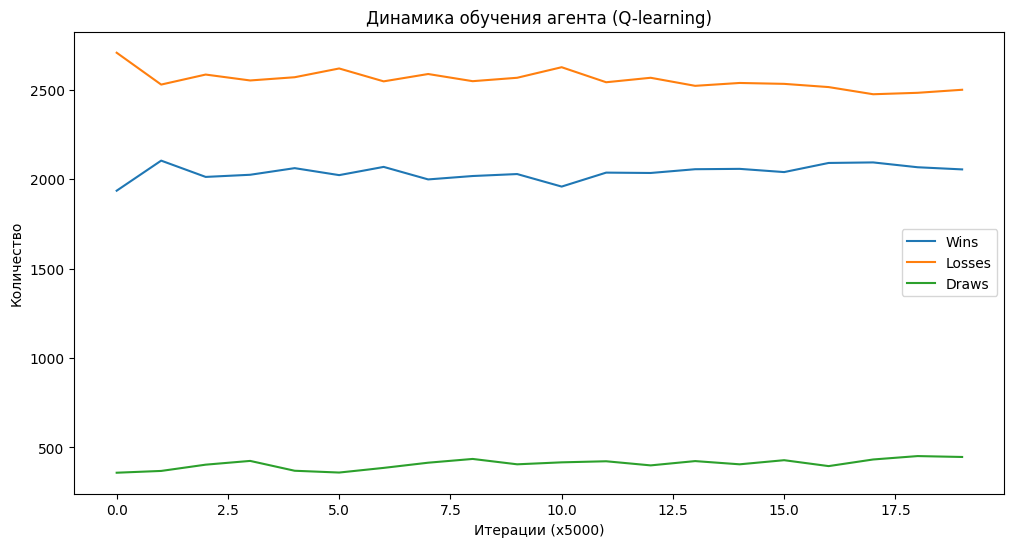

Доля выигранных игр: 43.68%


In [ ]:
import gymnasium as gym
import numpy as np
from tqdm import tqdm
from dataclasses import dataclass
import matplotlib.pyplot as plt


@dataclass
class Config:
    discount: float = 0.95  # Коэффициент дисконтирования
    lr: float = 0.01        # Скорость обучения
    n_episodes: int = 100_000  # Количество эпизодов
    print_every: int = 5000    # Интервал для печати статистики


class Agent:
    def __init__(self, env: gym.Env, config: Config) -> None:
        self.env = env
        self.cfg = config
        self._create_q_table()

    def _create_q_table(self):
        """
        Создание таблицы Q-функции.
        Размерность пространства состояний:
        - Очки игрока (1-32) -> индекс [0-31]
        - Карта дилера (1-10) -> индекс [0-9]
        - Наличие используемого туза (0 или 1) -> индекс [0-1]
        - Действие (0 - stick, 1 - hit)
        """
        self.q_table = np.zeros((32, 11, 2, 2))  # 32x11x2x2 - состояние и действие

    def get_action(self, state: tuple) -> int:
        """
        Выбор действия:
        - Epsilon-greedy политика: случайное действие с вероятностью epsilon
        """
        epsilon = 0.1  # Вероятность случайного действия
        player_sum, dealer_card, usable_ace = state
        if np.random.random() < epsilon:
            return self.env.action_space.sample()  # Случайное действие
        else:
            return np.argmax(self.q_table[player_sum, dealer_card, usable_ace])

    def update_q_table(self, state: tuple, new_state: tuple, reward: float, action: int, done: bool) -> None:
        """
        Обновление Q-функции:
        Q(s, a) = Q(s, a) + lr * (reward + discount * max_a' Q(s', a') - Q(s, a))
        """
        player_sum, dealer_card, usable_ace = state
        next_player_sum, next_dealer_card, next_usable_ace = new_state

        # Будущая награда равна 0, если эпизод завершён
        future_reward = 0 if done else np.max(self.q_table[next_player_sum, next_dealer_card, next_usable_ace])

        # Обновление Q-значения
        current_q = self.q_table[player_sum, dealer_card, usable_ace, action]
        self.q_table[player_sum, dealer_card, usable_ace, action] += self.cfg.lr * (
            reward + self.cfg.discount * future_reward - current_q
        )

    def run_episode(self) -> float:
        """
        Проведение одного эпизода и обновление Q-таблицы.
        Возвращает итоговую награду.
        """
        done = False
        state, _ = self.env.reset()
        total_reward = 0

        while not done:
            action = self.get_action(state)
            new_state, reward, terminated, truncated, _ = self.env.step(action)
            done = terminated or truncated

            self.update_q_table(state, new_state, reward, action, done)
            state = new_state
            total_reward += reward

        return total_reward

    def train(self):
        """
        Тренировка агента. Собирает статистику.
        """
        ep_rewards = []  # Все награды
        stats = {"wins": [], "losses": [], "draws": []}  # Статистика

        for ep in tqdm(range(self.cfg.n_episodes)):
            reward = self.run_episode()
            ep_rewards.append(reward)

            # Сбор статистики каждые print_every эпизодов
            if (ep + 1) % self.cfg.print_every == 0:
                wins = sum(r > 0 for r in ep_rewards[-self.cfg.print_every:])
                losses = sum(r < 0 for r in ep_rewards[-self.cfg.print_every:])
                draws = sum(r == 0 for r in ep_rewards[-self.cfg.print_every:])
                stats["wins"].append(wins)
                stats["losses"].append(losses)
                stats["draws"].append(draws)
                print(f"Эпизод {ep + 1}: Выигрышей: {wins}, Поражений: {losses}, Ничьих: {draws}")

        return ep_rewards, stats


# Конфигурация и создание окружения
config = Config()
env = gym.make("Blackjack-v1")
agent = Agent(env, config)

# Тренировка агента
rewards, stats = agent.train()

# Визуализация статистики
plt.figure(figsize=(12, 6))
plt.plot(stats["wins"], label="Wins")
plt.plot(stats["losses"], label="Losses")
plt.plot(stats["draws"], label="Draws")
plt.xlabel("Итерации (x5000)")
plt.ylabel("Количество")
plt.legend()
plt.title("Динамика обучения агента (Q-learning)")
plt.show()

# Игра с обученной стратегией
N = 10_000
wins = 0

for _ in range(N):
    state, _ = env.reset()
    done = False

    while not done:
        player_sum, dealer_card, usable_ace = state
        action = np.argmax(agent.q_table[player_sum, dealer_card, usable_ace])
        state, reward, done, _, _ = env.step(action)

    if reward > 0:
        wins += 1

win_rate = wins / N
print(f"Доля выигранных игр: {win_rate:.2%}")


  6%|▌         | 5575/100000 [00:01<00:25, 3766.82it/s]

  Эпизод 5000: Выигрышей:2069 (41%), Поражений: 2584 (52%), Ничьих: 347 (7%)


 11%|█         | 11050/100000 [00:02<00:15, 5871.09it/s]

  Эпизод 10000: Выигрышей:2058 (41%), Поражений: 2560 (51%), Ничьих: 382 (8%)


 16%|█▌        | 16228/100000 [00:03<00:13, 6314.65it/s]

  Эпизод 15000: Выигрышей:2065 (41%), Поражений: 2551 (51%), Ничьих: 384 (8%)


 21%|██▏       | 21316/100000 [00:04<00:12, 6305.56it/s]

  Эпизод 20000: Выигрышей:2028 (41%), Поражений: 2560 (51%), Ничьих: 412 (8%)


 26%|██▌       | 25827/100000 [00:04<00:12, 6042.89it/s]

  Эпизод 25000: Выигрышей:2072 (41%), Поражений: 2563 (51%), Ничьих: 365 (7%)


 31%|███       | 30887/100000 [00:05<00:11, 5809.64it/s]

  Эпизод 30000: Выигрышей:2023 (40%), Поражений: 2570 (51%), Ничьих: 407 (8%)


 36%|███▌      | 35952/100000 [00:06<00:11, 5679.08it/s]

  Эпизод 35000: Выигрышей:2023 (40%), Поражений: 2547 (51%), Ничьих: 430 (9%)


 41%|████      | 40966/100000 [00:07<00:09, 6319.88it/s]

  Эпизод 40000: Выигрышей:2067 (41%), Поражений: 2534 (51%), Ничьих: 399 (8%)


 46%|████▌     | 45890/100000 [00:08<00:08, 6110.53it/s]

  Эпизод 45000: Выигрышей:2086 (42%), Поражений: 2503 (50%), Ничьих: 411 (8%)


 51%|█████     | 50754/100000 [00:09<00:08, 5789.72it/s]

  Эпизод 50000: Выигрышей:2155 (43%), Поражений: 2428 (49%), Ничьих: 417 (8%)


 56%|█████▌    | 55828/100000 [00:09<00:07, 6270.96it/s]

  Эпизод 55000: Выигрышей:2090 (42%), Поражений: 2494 (50%), Ничьих: 416 (8%)


 61%|██████    | 60868/100000 [00:10<00:06, 6039.63it/s]

  Эпизод 60000: Выигрышей:2080 (42%), Поражений: 2541 (51%), Ничьих: 379 (8%)


 66%|██████▌   | 65947/100000 [00:11<00:05, 5862.46it/s]

  Эпизод 65000: Выигрышей:2110 (42%), Поражений: 2475 (50%), Ничьих: 415 (8%)


 70%|███████   | 70443/100000 [00:12<00:07, 3882.62it/s]

  Эпизод 70000: Выигрышей:2092 (42%), Поражений: 2537 (51%), Ничьих: 371 (7%)


 76%|███████▌  | 75706/100000 [00:13<00:06, 3770.50it/s]

  Эпизод 75000: Выигрышей:2019 (40%), Поражений: 2562 (51%), Ничьих: 419 (8%)


 81%|████████  | 80962/100000 [00:15<00:03, 5800.96it/s]

  Эпизод 80000: Выигрышей:2065 (41%), Поражений: 2536 (51%), Ничьих: 399 (8%)


 86%|████████▌ | 85964/100000 [00:15<00:02, 6103.66it/s]

  Эпизод 85000: Выигрышей:2035 (41%), Поражений: 2594 (52%), Ничьих: 371 (7%)


 91%|█████████ | 90841/100000 [00:16<00:01, 6002.57it/s]

  Эпизод 90000: Выигрышей:2072 (41%), Поражений: 2507 (50%), Ничьих: 421 (8%)


 96%|█████████▌| 95815/100000 [00:17<00:00, 5845.29it/s]

  Эпизод 95000: Выигрышей:2017 (40%), Поражений: 2598 (52%), Ничьих: 385 (8%)


100%|██████████| 100000/100000 [00:18<00:00, 5476.72it/s]


  Эпизод 100000: Выигрышей:2083 (42%), Поражений: 2570 (51%), Ничьих: 347 (7%)


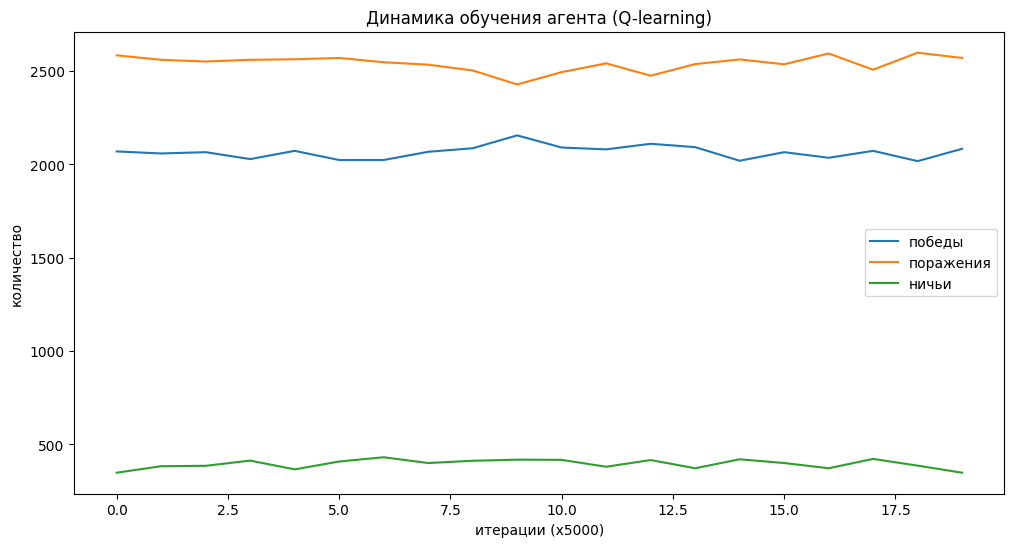



Итог игры с обученной стратегией agent.q_table:

Доля выигранных игр: 43.78%


In [ ]:
class Agent:
    def __init__(self, env: gym.Env, config: Config) -> None:
        self.env = env
        self.cfg = config
        self._create_q_table()

    def _create_q_table(self):
        # напишите код для создания таблицы Q-функции
        # для окружения Blackjack должен получиться массив 32x11x2x2
        """
        Создание таблицы Q-функции:
        Размерность пространства состояний:
        - Очки игрока (1-32) -> индекс [0-31]
        - Карта дилера (1-10) -> индекс [0-9]
        - Наличие используемого туза (0 или 1) -> индекс [0-1]
        - Действие (0 - stand, 1 - hit)
        """
        self.q_table = np.zeros((32, 11, 2, 2))  # 32x11x2x2 - состояние и действие

    def get_action(self, state: tuple) -> int:
        # найдите и верните индекс максимума Q-функции для состояния state
        # обратите внимание, что максимумов может быть несколько
        """
        Выбор действия:
        - Epsilon-greedy политика: случайное действие с вероятностью epsilon
        """
        epsilon = 0.1  # вероятность случайного действия
        player_sum, dealer_card, usable_ace = state

        if np.random.random() < epsilon:           # eсли случ выбранное число меньше eps, то выбирается
                                                   # случ действие с помощью sample(). это позволяет агенту исследовать новые стратегии и избегать застревания в локальных оптимумах.
            return self.env.action_space.sample()  # случ действие - 0 или 1
        else:

            return np.argmax(self.q_table[player_sum, dealer_card, usable_ace])   # иначе возвращается действие, которое соответствует наиб знач в таблице Q для данного состояния.
                                                                                  # таблица Q хранит оценки полезностей различных действий в разных состояниях,
                                                                                  # np.argmax находит idx max эл-та в соотв-ей строке таблицы Q.

    def update_q_table(
        self,
        state: np.ndarray | tuple,
        new_state: np.ndarray | tuple,
        reward: float, action: int,
        done: bool
    ) -> None:
    # напишите код для обновления Q-функции согласно правилу выше
    # если эпизод закончен, то будущая награда равна 0


        # Обновление Q-функции:
        #        Q(s, a) = (1 - lr)*Q(s, a) + lr * (reward + discount * max_a' Q(s', a'))

        player_sum, dealer_card, usable_ace = state
        next_player_sum, next_dealer_card, next_usable_ace = new_state

        # будущая награда равна 0, если эпизод завершён
        future_reward = 0 if done else np.max(self.q_table[next_player_sum, next_dealer_card, next_usable_ace])

        # обновление Q-значения
        current_q = self.q_table[player_sum, dealer_card, usable_ace, action]

        self.q_table[player_sum, dealer_card, usable_ace, action] = (1 - self.cfg.lr) * current_q + self.cfg.lr * (
            reward + self.cfg.discount * future_reward
        )


    def run_episode(self) -> float:
        done = False
        state, _ = self.env.reset()
        total_reward = 0

        while not done:
            action = self.get_action(state)
            new_state, reward, terminated, truncated, _ = self.env.step(action)
            done = terminated or truncated

            self.update_q_table(state, new_state, reward, action, done)
            state = new_state
            total_reward += reward

        return total_reward  # итоговая награда

    def train(self):
        # Допишите код для сбора статистики
        ep_rewards = []  # все награды
        stats = {"wins": [], "losses": [], "draws": []}  # статистика

        for ep in tqdm(range(self.cfg.n_episodes)):
            reward = self.run_episode()
            ep_rewards.append(reward)

            # сбор статистики каждые print_every эпизодов
            if (ep + 1) % self.cfg.print_every == 0:
                total_episodes = len(ep_rewards[-self.cfg.print_every:])
                wins = sum(r > 0 for r in ep_rewards[-self.cfg.print_every:])
                losses = sum(r < 0 for r in ep_rewards[-self.cfg.print_every:])
                draws = sum(r == 0 for r in ep_rewards[-self.cfg.print_every:])

                win_percentage = f"{wins} ({100 * wins / total_episodes:.0f}%)"
                loss_percentage = f"{losses} ({100 * losses / total_episodes:.0f}%)"
                draw_percentage = f"{draws} ({100 * draws / total_episodes:.0f}%)"

                stats["wins"].append(wins)
                stats["losses"].append(losses)
                stats["draws"].append(draws)

                print(f"  Эпизод {ep + 1}: Выигрышей:{win_percentage}, Поражений: {loss_percentage}, Ничьих: {draw_percentage}")

        return ep_rewards, stats


# создание окружения
config = Config()
env = gym.make("Blackjack-v1")
agent = Agent(env, config)

# тренировка агента
rewards, stats = agent.train()

# визуализация
plt.figure(figsize=(12, 6))
plt.plot(stats["wins"], label="победы")
plt.plot(stats["losses"], label="поражения")
plt.plot(stats["draws"], label="ничьи")
plt.xlabel("итерации (x5000)")
plt.ylabel("количество")
plt.legend()
plt.title("Динамика обучения агента (Q-learning)")
plt.show()

print('\n\nИтог игры с обученной стратегией agent.q_table:\n')
N = 10_000
wins = 0

for _ in range(N):
    state, _ = env.reset()
    done = False

    while not done:
        player_sum, dealer_card, usable_ace = state
        action = np.argmax(agent.q_table[player_sum, dealer_card, usable_ace]) # итоговая стратегия - agent.q_table
        state, reward, done, _, _ = env.step(action)

    if reward > 0:
        wins += 1

win_rate = wins / N
print(f"Доля выигранных игр: {win_rate:.2%}")

#### Обучение

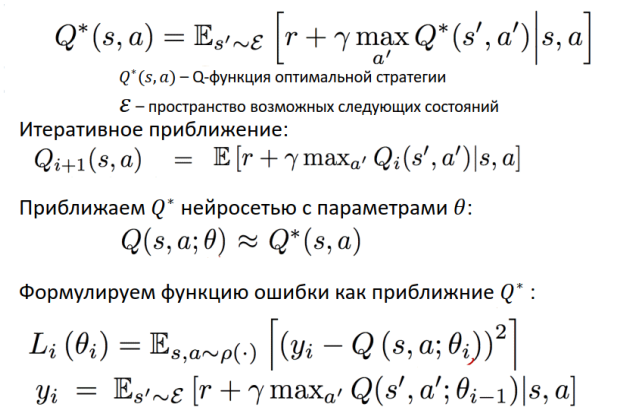


Cтратегия для выбора действия:
$$a_{t+1}(s_t) = argmax_aQ(s_t, a)$$

Правило обновления Q-функции:

![q-learning](https://wikimedia.org/api/rest_v1/media/math/render/svg/d247db9eaad4bd343e7882ec546bf3847ebd36d8)


In [ ]:
from dataclasses import dataclass
from tqdm import tqdm
import matplotlib.pyplot as plt

# Обновление Q-функции:
#        Q(s, a) = (1 - lr)*Q(s, a) + lr * (reward + discount * max_a' Q(s', a'))

@dataclass
class Config:
    discount: float = 0.95  # discount factor -  коэфф дисконтирования
    lr: float = 0.01        # alpha
    n_episodes: int = 100_000
    print_every: int = 5000    # интервал для печати статистики

  6%|▌         | 6117/100000 [00:00<00:14, 6394.51it/s]

  Эпизод 5000: Выигрышей:2079 (42%), Поражений: 2530 (51%), Ничьих: 391 (8%)


 10%|█         | 10451/100000 [00:02<00:34, 2621.43it/s]

  Эпизод 10000: Выигрышей:2100 (42%), Поражений: 2500 (50%), Ничьих: 400 (8%)


 16%|█▌        | 15666/100000 [00:03<00:21, 3984.43it/s]

  Эпизод 15000: Выигрышей:2161 (43%), Поражений: 2480 (50%), Ничьих: 359 (7%)


 21%|██        | 20798/100000 [00:04<00:16, 4935.81it/s]

  Эпизод 20000: Выигрышей:2150 (43%), Поражений: 2439 (49%), Ничьих: 411 (8%)


 26%|██▌       | 25933/100000 [00:05<00:12, 6101.49it/s]

  Эпизод 25000: Выигрышей:2130 (43%), Поражений: 2482 (50%), Ничьих: 388 (8%)


 31%|███       | 31011/100000 [00:06<00:11, 5972.92it/s]

  Эпизод 30000: Выигрышей:2105 (42%), Поражений: 2453 (49%), Ничьих: 442 (9%)


 36%|███▌      | 36108/100000 [00:07<00:10, 6343.27it/s]

  Эпизод 35000: Выигрышей:2086 (42%), Поражений: 2487 (50%), Ничьих: 427 (9%)


 41%|████▏     | 41280/100000 [00:08<00:09, 6477.96it/s]

  Эпизод 40000: Выигрышей:2099 (42%), Поражений: 2453 (49%), Ничьих: 448 (9%)


 46%|████▌     | 45712/100000 [00:08<00:09, 6005.28it/s]

  Эпизод 45000: Выигрышей:2097 (42%), Поражений: 2477 (50%), Ничьих: 426 (9%)


 51%|█████     | 51055/100000 [00:09<00:08, 5944.37it/s]

  Эпизод 50000: Выигрышей:2107 (42%), Поражений: 2420 (48%), Ничьих: 473 (9%)


 56%|█████▌    | 55634/100000 [00:10<00:07, 6272.12it/s]

  Эпизод 55000: Выигрышей:2155 (43%), Поражений: 2448 (49%), Ничьих: 397 (8%)


 61%|██████    | 60752/100000 [00:11<00:06, 6177.81it/s]

  Эпизод 60000: Выигрышей:2129 (43%), Поражений: 2453 (49%), Ничьих: 418 (8%)


 66%|██████▌   | 65951/100000 [00:12<00:05, 6442.97it/s]

  Эпизод 65000: Выигрышей:2103 (42%), Поражений: 2461 (49%), Ничьих: 436 (9%)


 71%|███████   | 71133/100000 [00:13<00:04, 6156.66it/s]

  Эпизод 70000: Выигрышей:2134 (43%), Поражений: 2403 (48%), Ничьих: 463 (9%)


 76%|███████▌  | 75707/100000 [00:13<00:03, 6321.71it/s]

  Эпизод 75000: Выигрышей:2097 (42%), Поражений: 2442 (49%), Ничьих: 461 (9%)


 81%|████████  | 80898/100000 [00:14<00:03, 6346.99it/s]

  Эпизод 80000: Выигрышей:2155 (43%), Поражений: 2416 (48%), Ничьих: 429 (9%)


 86%|████████▌ | 85500/100000 [00:15<00:03, 3936.53it/s]

  Эпизод 85000: Выигрышей:2137 (43%), Поражений: 2446 (49%), Ничьих: 417 (8%)


 91%|█████████ | 90549/100000 [00:16<00:02, 3801.91it/s]

  Эпизод 90000: Выигрышей:2099 (42%), Поражений: 2443 (49%), Ничьих: 458 (9%)


 96%|█████████▌| 95900/100000 [00:18<00:00, 5749.97it/s]

  Эпизод 95000: Выигрышей:2133 (43%), Поражений: 2406 (48%), Ничьих: 461 (9%)


100%|██████████| 100000/100000 [00:18<00:00, 5346.24it/s]


  Эпизод 100000: Выигрышей:2163 (43%), Поражений: 2389 (48%), Ничьих: 448 (9%)


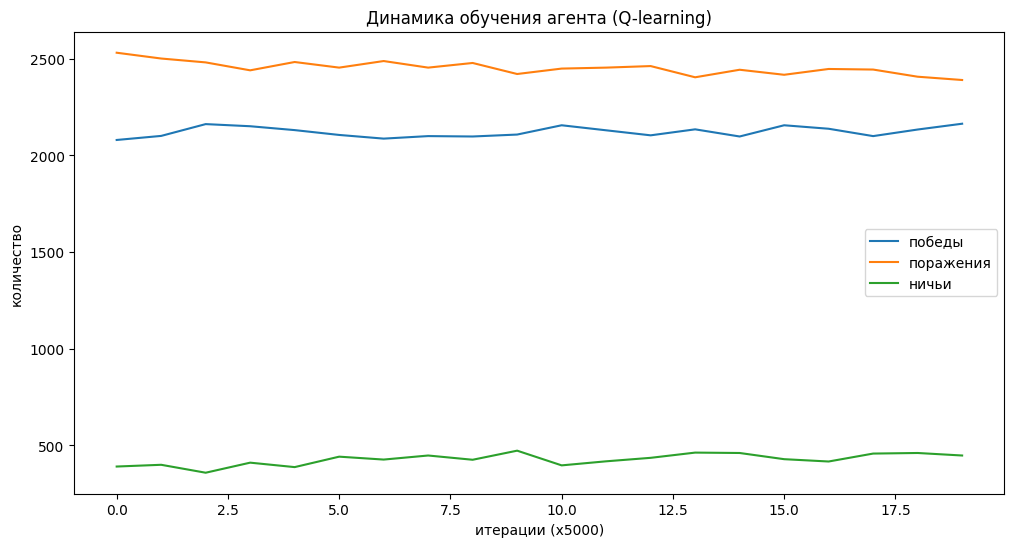



Итог игры с обученной стратегией agent.q_table:

Доля выигранных игр: 41.88%


In [ ]:
class Agent:
    def __init__(self, env: gym.Env, config: Config) -> None:
        self.env = env
        self.cfg = config
        self._create_q_table()

    def _create_q_table(self):
        # напишите код для создания таблицы Q-функции
        # для окружения Blackjack должен получиться массив 32x11x2x2
        """
        Создание таблицы Q-функции:
        Размерность пространства состояний:
        - Очки игрока (1-32) -> индекс [0-31]
        - Карта дилера (1-10) -> индекс [0-9]
        - Наличие используемого туза (0 или 1) -> индекс [0-1]
        - Действие (0 - stand, 1 - hit)
        """
        self.q_table = np.zeros((32, 11, 2, 2))  # 32x11x2x2 - состояние и действие

    def get_action(self, state: tuple) -> int:
        # найдите и верните индекс максимума Q-функции для состояния state
        # обратите внимание, что максимумов может быть несколько

        player_sum, dealer_card, usable_ace = state  # вектор состояния
        return np.argmax(self.q_table[player_sum, dealer_card, usable_ace])   # возвращается действие, которое соответствует наиб знач в таблице Q для данного состояния.
                                                                              # таблица Q хранит оценки полезностей различных действий в разных состояниях,
                                                                              # np.argmax находит idx max эл-та в соотв-ей строке таблицы Q.

    def update_q_table(
        self,
        state: np.ndarray | tuple,
        new_state: np.ndarray | tuple,
        reward: float, action: int,
        done: bool
    ) -> None:
    # напишите код для обновления Q-функции согласно правилу выше
    # если эпизод закончен, то будущая награда равна 0


        # Обновление Q-функции:
        #        Q(s, a) = (1 - lr)*Q(s, a) + lr * (reward + discount * max_a' Q(s', a'))

        player_sum, dealer_card, usable_ace = state
        next_player_sum, next_dealer_card, next_usable_ace = new_state

        # будущая награда равна 0, если эпизод завершён
        future_reward = 0 if done else np.max(self.q_table[next_player_sum, next_dealer_card, next_usable_ace])

        # обновление Q-значения
        current_q = self.q_table[player_sum, dealer_card, usable_ace, action]

        self.q_table[player_sum, dealer_card, usable_ace, action] = (1 - self.cfg.lr) * current_q + self.cfg.lr * (
            reward + self.cfg.discount * future_reward
        )


    def run_episode(self) -> float:
        done = False
        state, _ = self.env.reset()
        total_reward = 0

        while not done:
            action = self.get_action(state)
            new_state, reward, terminated, truncated, _ = self.env.step(action)
            done = terminated or truncated

            self.update_q_table(state, new_state, reward, action, done)
            state = new_state
            total_reward += reward

        return total_reward  # итоговая награда

    def train(self):
        # Допишите код для сбора статистики
        ep_rewards = []  # все награды
        stats = {"wins": [], "losses": [], "draws": []}  # статистика

        for ep in tqdm(range(self.cfg.n_episodes)):
            reward = self.run_episode()
            ep_rewards.append(reward)

            # сбор статистики каждые print_every эпизодов
            if (ep + 1) % self.cfg.print_every == 0:
                total_episodes = len(ep_rewards[-self.cfg.print_every:])
                wins = sum(r > 0 for r in ep_rewards[-self.cfg.print_every:])
                losses = sum(r < 0 for r in ep_rewards[-self.cfg.print_every:])
                draws = sum(r == 0 for r in ep_rewards[-self.cfg.print_every:])

                win_percentage = f"{wins} ({100 * wins / total_episodes:.0f}%)"
                loss_percentage = f"{losses} ({100 * losses / total_episodes:.0f}%)"
                draw_percentage = f"{draws} ({100 * draws / total_episodes:.0f}%)"

                stats["wins"].append(wins)
                stats["losses"].append(losses)
                stats["draws"].append(draws)

                print(f"  Эпизод {ep + 1}: Выигрышей:{win_percentage}, Поражений: {loss_percentage}, Ничьих: {draw_percentage}")

        return ep_rewards, stats


# создание окружения
config = Config()
env = gym.make("Blackjack-v1")
agent = Agent(env, config)

# тренировка агента
rewards, stats = agent.train()

# визуализация
plt.figure(figsize=(12, 6))
plt.plot(stats["wins"], label="победы")
plt.plot(stats["losses"], label="поражения")
plt.plot(stats["draws"], label="ничьи")
plt.xlabel("итерации (x5000)")
plt.ylabel("количество")
plt.legend()
plt.title("Динамика обучения агента (Q-learning)")
plt.show()

print('\n\nИтог игры с обученной стратегией agent.q_table:\n')
N = 10_000
wins = 0

for _ in range(N):
    state, _ = env.reset()
    done = False

    while not done:
        player_sum, dealer_card, usable_ace = state
        action = np.argmax(agent.q_table[player_sum, dealer_card, usable_ace]) # итоговая стратегия - agent.q_table
        state, reward, done, _, _ = env.step(action)

    if reward > 0:
        wins += 1

win_rate = wins / N
print(f"Доля выигранных игр: {win_rate:.2%}")

<p class="task" id="2"></p>

### 2\. Повторите решение предыдущей задачи, используя алгоритм $\epsilon$-greedy Q-learning. Исследуйте, как гиперпараметры и способ инициализации значений Q-функции влияют на результат.

Cтратегия для выбора действия:
1. Сгенерировать число $p$ из $U(0, 1)$;
2. Если $p < \epsilon$, то выбрать действие случайным образом;
3. В противном случае $a_{t+1}(s_t) = argmax_aQ(s_t, a)$.

Правило обновления Q-функции:
![q-learning](https://wikimedia.org/api/rest_v1/media/math/render/svg/d247db9eaad4bd343e7882ec546bf3847ebd36d8)

- [ ] Проверено на семинаре

In [ ]:
from dataclasses import dataclass

@dataclass
class Config:
    discount: float = 0.95        # коэфф дисконт
    lr: float = 0.005
    n_episodes: int = 100_000
    epsilon: float = 1.0         # начальное значение epsilon
    final_epsilon: float = 0.3   # конечное значение epsilon
    print_every: int = 5000

   Уменьшение epsilon осуществляется по следующей формуле:
   $
   \epsilon = \max(\epsilon_{final}, \epsilon - (\epsilon -\epsilon_{final}) \times \frac{\text{episode}}{\text{n_episodes}})
  $

   Где:
   - $\epsilon$ — текущее значение epsilon,
   - $\epsilon_{final}$ — конечное значение `epsilon`,
   - $(\epsilon -\epsilon_{final})$ — разница между начальным и конечным значениями epsilon,
   - $\frac{\text{episode}}{\text{n_episodes}}$ — доля пройденных эпизодов относительно общего их количества.

  6%|▌         | 5677/100000 [00:01<00:24, 3822.88it/s]

  Эпизод 5000: Выигрышей:1369 (27%), Поражений: 3403 (68%), Ничьих: 228 (5%)


 11%|█         | 10707/100000 [00:02<00:21, 4138.71it/s]

  Эпизод 10000: Выигрышей:1466 (29%), Поражений: 3330 (67%), Ничьих: 204 (4%)


 16%|█▌        | 15832/100000 [00:03<00:17, 4915.61it/s]

  Эпизод 15000: Выигрышей:1546 (31%), Поражений: 3219 (64%), Ничьих: 235 (5%)


 21%|██        | 21207/100000 [00:04<00:13, 6031.43it/s]

  Эпизод 20000: Выигрышей:1459 (29%), Поражений: 3295 (66%), Ничьих: 246 (5%)


 26%|██▋       | 26294/100000 [00:05<00:11, 6416.86it/s]

  Эпизод 25000: Выигрышей:1544 (31%), Поражений: 3212 (64%), Ничьих: 244 (5%)


 31%|███       | 30860/100000 [00:06<00:11, 6201.93it/s]

  Эпизод 30000: Выигрышей:1578 (32%), Поражений: 3154 (63%), Ничьих: 268 (5%)


 36%|███▌      | 36063/100000 [00:07<00:10, 6209.07it/s]

  Эпизод 35000: Выигрышей:1597 (32%), Поражений: 3146 (63%), Ничьих: 257 (5%)


 41%|████      | 40651/100000 [00:07<00:09, 6373.24it/s]

  Эпизод 40000: Выигрышей:1621 (32%), Поражений: 3106 (62%), Ничьих: 273 (5%)


 46%|████▌     | 45557/100000 [00:08<00:11, 4584.18it/s]

  Эпизод 45000: Выигрышей:1601 (32%), Поражений: 3144 (63%), Ничьих: 255 (5%)


 51%|█████     | 50768/100000 [00:09<00:12, 4023.42it/s]

  Эпизод 50000: Выигрышей:1649 (33%), Поражений: 3056 (61%), Ничьих: 295 (6%)


 55%|█████▌    | 55453/100000 [00:11<00:11, 3795.46it/s]

  Эпизод 55000: Выигрышей:1695 (34%), Поражений: 3031 (61%), Ничьих: 274 (5%)


 61%|██████    | 61135/100000 [00:12<00:06, 5908.27it/s]

  Эпизод 60000: Выигрышей:1680 (34%), Поражений: 3011 (60%), Ничьих: 309 (6%)


 66%|██████▌   | 65625/100000 [00:12<00:05, 6179.19it/s]

  Эпизод 65000: Выигрышей:1754 (35%), Поражений: 2951 (59%), Ничьих: 295 (6%)


 71%|███████   | 70771/100000 [00:13<00:04, 6429.16it/s]

  Эпизод 70000: Выигрышей:1741 (35%), Поражений: 2970 (59%), Ничьих: 289 (6%)


 76%|███████▌  | 75887/100000 [00:14<00:03, 6277.65it/s]

  Эпизод 75000: Выигрышей:1776 (36%), Поражений: 2915 (58%), Ничьих: 309 (6%)


 81%|████████  | 80987/100000 [00:15<00:03, 6035.11it/s]

  Эпизод 80000: Выигрышей:1850 (37%), Поражений: 2832 (57%), Ничьих: 318 (6%)


 86%|████████▌ | 85978/100000 [00:16<00:02, 5943.20it/s]

  Эпизод 85000: Выигрышей:1862 (37%), Поражений: 2801 (56%), Ничьих: 337 (7%)


 91%|█████████ | 91028/100000 [00:17<00:01, 5978.68it/s]

  Эпизод 90000: Выигрышей:1910 (38%), Поражений: 2737 (55%), Ничьих: 353 (7%)


 96%|█████████▌| 96000/100000 [00:17<00:00, 5812.05it/s]

  Эпизод 95000: Выигрышей:1849 (37%), Поражений: 2829 (57%), Ничьих: 322 (6%)


100%|██████████| 100000/100000 [00:18<00:00, 5404.12it/s]


  Эпизод 100000: Выигрышей:1878 (38%), Поражений: 2763 (55%), Ничьих: 359 (7%)


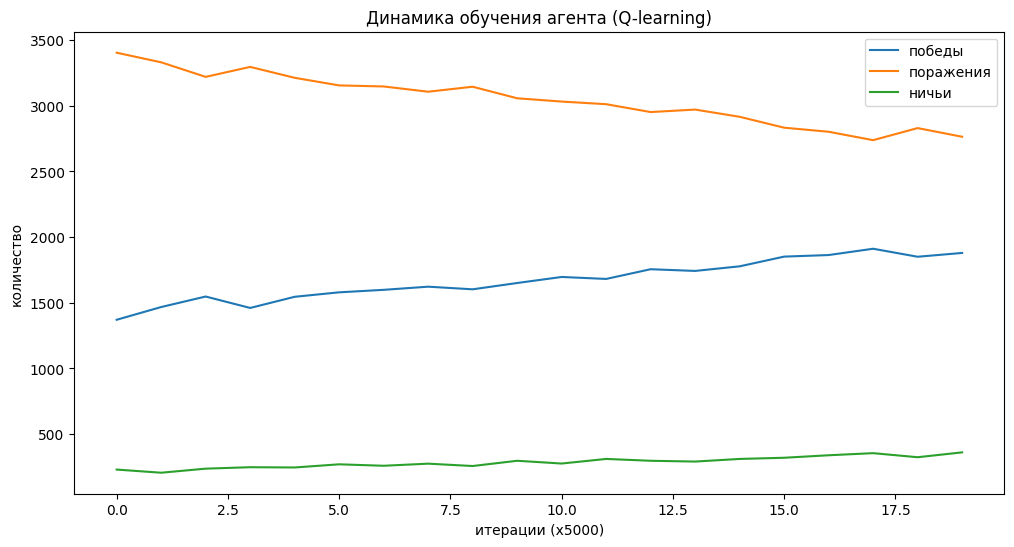



Итог игры с epsilon-greedy:

Доля выигранных игр: 43.06%


In [ ]:
class EpsilonGreedyAgent:
    def __init__(self, env: gym.Env, config: Config) -> None:
        self.env = env
        self.cfg = config
        self._create_q_table()
        self.epsilon = config.epsilon

    def _create_q_table(self):
        """
        Создание таблицы Q-функции.
        Пространство состояний: 32x11x2 (игрок, карта дилера, usable ace).
        Пространство действий: 2 (stick, hit).
        """
        self.q_table = np.zeros((32, 11, 2, 2))  # 32x11x2x2 (state, action)

    def _update_epsilon(self, episode: int) -> None:  ###
        """
        Линейное уменьшение epsilon с течением времени от начального до конечного значения.
        """
        self.epsilon = max(
            self.cfg.final_epsilon,
            self.cfg.epsilon - (self.cfg.epsilon - self.cfg.final_epsilon) * (episode / self.cfg.n_episodes),
        )

    def get_action(self, state: tuple) -> int:
        """
        Выбор действия по epsilon-greedy политике:
        - С вероятностью epsilon выбирается случайное действие.
        - Иначе выбирается действие, максимизирующее Q-значение.
        """
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()  # Случайное действие
        else:
            player_sum, dealer_card, usable_ace = state
            return np.argmax(self.q_table[player_sum, dealer_card, usable_ace])

    def update_q_table(
            self,
            state: np.ndarray | tuple,
            new_state: np.ndarray | tuple,
            reward: float, action: int,
            done: bool
        ) -> None:
        # напишите код для обновления Q-функции согласно правилу выше
        # если эпизод закончен, то будущая награда равна 0


            # Обновление Q-функции:
            #        Q(s, a) = (1 - lr)*Q(s, a) + lr * (reward + discount * max_a' Q(s', a'))

            player_sum, dealer_card, usable_ace = state
            next_player_sum, next_dealer_card, next_usable_ace = new_state

            # будущая награда равна 0, если эпизод завершён
            future_reward = 0 if done else np.max(self.q_table[next_player_sum, next_dealer_card, next_usable_ace])

            # обновление Q-значения
            current_q = self.q_table[player_sum, dealer_card, usable_ace, action]

            self.q_table[player_sum, dealer_card, usable_ace, action] = (1 - self.cfg.lr) * current_q + self.cfg.lr * (
                reward + self.cfg.discount * future_reward
            )

    def run_episode(self, episode: int) -> float:  ###
        self._update_epsilon(episode)  # oбновление epsilon
        done = False
        state, _ = self.env.reset()
        total_reward = 0

        while not done:
            action = self.get_action(state)
            new_state, reward, terminated, truncated, _ = self.env.step(action)
            done = terminated or truncated

            self.update_q_table(state, new_state, reward, action, done)
            state = new_state
            total_reward += reward

        return total_reward # итоговая награда

    def train(self):
        # Допишите код для сбора статистики
        ep_rewards = []  # все награды
        stats = {"wins": [], "losses": [], "draws": []}  # статистика

        for ep in tqdm(range(self.cfg.n_episodes)):
            reward = self.run_episode(ep)
            ep_rewards.append(reward)

            # сбор статистики каждые print_every эпизодов
            if (ep + 1) % self.cfg.print_every == 0:
                total_episodes = len(ep_rewards[-self.cfg.print_every:])
                wins = sum(r > 0 for r in ep_rewards[-self.cfg.print_every:])
                losses = sum(r < 0 for r in ep_rewards[-self.cfg.print_every:])
                draws = sum(r == 0 for r in ep_rewards[-self.cfg.print_every:])

                win_percentage = f"{wins} ({100 * wins / total_episodes:.0f}%)"
                loss_percentage = f"{losses} ({100 * losses / total_episodes:.0f}%)"
                draw_percentage = f"{draws} ({100 * draws / total_episodes:.0f}%)"

                stats["wins"].append(wins)
                stats["losses"].append(losses)
                stats["draws"].append(draws)

                print(f"  Эпизод {ep + 1}: Выигрышей:{win_percentage}, Поражений: {loss_percentage}, Ничьих: {draw_percentage}")

        return ep_rewards, stats


# создание окружения
config = Config()
env = gym.make("Blackjack-v1")
agent = EpsilonGreedyAgent(env, config)

# тренировка агента
rewards, stats = agent.train()

# визуализация
plt.figure(figsize=(12, 6))
plt.plot(stats["wins"], label="победы")
plt.plot(stats["losses"], label="поражения")
plt.plot(stats["draws"], label="ничьи")
plt.xlabel("итерации (x5000)")
plt.ylabel("количество")
plt.legend()
plt.title("Динамика обучения агента (Q-learning)")
plt.show()

print('\n\nИтог игры с epsilon-greedy:\n')
N = 10_000
wins = 0

for _ in range(N):
    state, _ = env.reset()
    done = False

    while not done:
        player_sum, dealer_card, usable_ace = state
        action = np.argmax(agent.q_table[player_sum, dealer_card, usable_ace]) # итоговая стратегия - agent.q_table
        state, reward, done, _, _ = env.step(action)

    if reward > 0:
        wins += 1

win_rate = wins / N
print(f"Доля выигранных игр: {win_rate:.2%}")

<p class="task" id="3"></p>

### 3\. Повторите решение задачи 1, используя алгоритм double Q-learning.

Cтратегия для выбора действия:
1. Сгенерировать число $p$ из $U(0, 1)$;
2. Если $p < \epsilon$, то выбрать действие случайным образом;
3. В противном случае $a_{t+1}(s_t) = argmax_a\left((Q^A_t + Q^B_t)(s_t, a))\right) $.

Правило обновления Q-функции:
$$
Q^A_{t+1}(s_{t}, a_{t}) = Q^A_{t}(s_{t}, a_{t}) + \alpha_{t}(s_{t}, a_{t}) \left(r_{t} + \gamma Q^B_{t}\left(s_{t+1}, {arg~max}_{a} Q^A_t(s_{t+1}, a)\right) - Q^A_{t}(s_{t}, a_{t})\right)
$$

$$
Q^B_{t+1}(s_{t}, a_{t}) = Q^B_{t}(s_{t}, a_{t}) + \alpha_{t}(s_{t}, a_{t}) \left(r_{t} + \gamma Q^A_{t}\left(s_{t+1}, {arg~max}_{a} Q^B_t(s_{t+1}, a)\right) - Q^B_{t}(s_{t}, a_{t})\right)
$$


- [ ] Проверено на семинаре

In [ ]:
from dataclasses import dataclass
import gymnasium as gym
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt

@dataclass
class Config:
    discount: float = 0.95        # коэфф дисконт
    lr: float = 0.005
    n_episodes: int = 100_000
    epsilon: float = 1.0         # начальное значение epsilon
    final_epsilon: float = 0.3   # конечное значение epsilon
    print_every: int = 5000

  5%|▌         | 5160/100000 [00:03<01:05, 1452.17it/s]

  Эпизод 5000: Выигрышей:1445 (29%), Поражений: 3338 (67%), Ничьих: 217 (4%)


 11%|█         | 10583/100000 [00:04<00:15, 5630.21it/s]

  Эпизод 10000: Выигрышей:1439 (29%), Поражений: 3352 (67%), Ничьих: 209 (4%)


 16%|█▋        | 16269/100000 [00:05<00:13, 6212.06it/s]

  Эпизод 15000: Выигрышей:1430 (29%), Поражений: 3355 (67%), Ничьих: 215 (4%)


 21%|██        | 20721/100000 [00:06<00:12, 6117.30it/s]

  Эпизод 20000: Выигрышей:1538 (31%), Поражений: 3236 (65%), Ничьих: 226 (5%)


 26%|██▌       | 25718/100000 [00:07<00:12, 6015.82it/s]

  Эпизод 25000: Выигрышей:1543 (31%), Поражений: 3218 (64%), Ничьих: 239 (5%)


 31%|███       | 30697/100000 [00:08<00:11, 6096.36it/s]

  Эпизод 30000: Выигрышей:1547 (31%), Поражений: 3207 (64%), Ничьих: 246 (5%)


 36%|███▌      | 35735/100000 [00:08<00:11, 5836.69it/s]

  Эпизод 35000: Выигрышей:1558 (31%), Поражений: 3193 (64%), Ничьих: 249 (5%)


 41%|████      | 40711/100000 [00:09<00:09, 6029.29it/s]

  Эпизод 40000: Выигрышей:1635 (33%), Поражений: 3083 (62%), Ничьих: 282 (6%)


 46%|████▌     | 45808/100000 [00:10<00:08, 6159.11it/s]

  Эпизод 45000: Выигрышей:1666 (33%), Поражений: 3036 (61%), Ничьих: 298 (6%)


 51%|█████     | 50863/100000 [00:11<00:08, 6046.02it/s]

  Эпизод 50000: Выигрышей:1638 (33%), Поражений: 3076 (62%), Ничьих: 286 (6%)


 56%|█████▌    | 55837/100000 [00:12<00:07, 6061.95it/s]

  Эпизод 55000: Выигрышей:1759 (35%), Поражений: 2977 (60%), Ничьих: 264 (5%)


 61%|██████    | 60871/100000 [00:13<00:06, 6293.81it/s]

  Эпизод 60000: Выигрышей:1704 (34%), Поражений: 2994 (60%), Ничьих: 302 (6%)


 66%|██████▌   | 65712/100000 [00:14<00:07, 4428.33it/s]

  Эпизод 65000: Выигрышей:1699 (34%), Поражений: 3036 (61%), Ничьих: 265 (5%)


 71%|███████   | 70567/100000 [00:15<00:08, 3412.68it/s]

  Эпизод 70000: Выигрышей:1772 (35%), Поражений: 2945 (59%), Ничьих: 283 (6%)


 76%|███████▌  | 76046/100000 [00:16<00:05, 4608.40it/s]

  Эпизод 75000: Выигрышей:1790 (36%), Поражений: 2895 (58%), Ничьих: 315 (6%)


 81%|████████  | 80826/100000 [00:17<00:03, 5717.65it/s]

  Эпизод 80000: Выигрышей:1860 (37%), Поражений: 2811 (56%), Ничьих: 329 (7%)


 86%|████████▌ | 85711/100000 [00:18<00:02, 6152.22it/s]

  Эпизод 85000: Выигрышей:1895 (38%), Поражений: 2759 (55%), Ничьих: 346 (7%)


 91%|█████████ | 90640/100000 [00:19<00:01, 5987.02it/s]

  Эпизод 90000: Выигрышей:1881 (38%), Поражений: 2799 (56%), Ничьих: 320 (6%)


 96%|█████████▌| 96142/100000 [00:20<00:00, 5985.72it/s]

  Эпизод 95000: Выигрышей:1916 (38%), Поражений: 2743 (55%), Ничьих: 341 (7%)


100%|██████████| 100000/100000 [00:20<00:00, 4808.06it/s]


  Эпизод 100000: Выигрышей:1963 (39%), Поражений: 2681 (54%), Ничьих: 356 (7%)


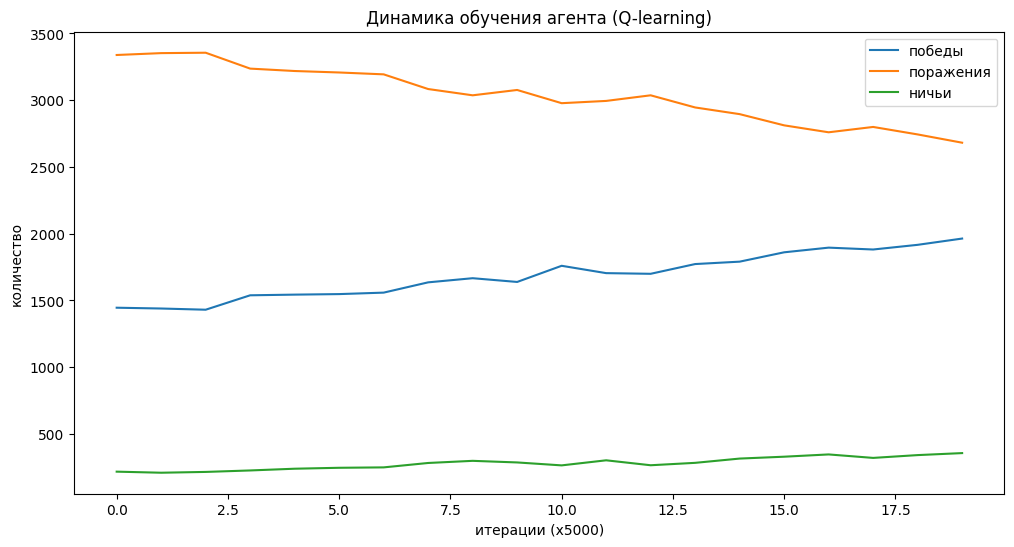



Итог игры с double Q-learning:

Доля выигранных игр: 43.94%


In [ ]:
class DoubleQLearningAgent:
    def __init__(self, env: gym.Env, config: Config) -> None:
        self.env = env
        self.cfg = config
        self._create_q_tables()
        self.epsilon = config.epsilon

    def _create_q_tables(self):
        """
        Создание 2 таблиц Q-функций:
        Пространство состояний: 32x11x2 (игрок, карта дилера, usable ace).
        Пространство действий: 2 (stick, hit).
        """
        self.q_a = np.zeros((32, 11, 2, 2))  # Q^A
        self.q_b = np.zeros((32, 11, 2, 2))  # Q^B

    def _update_epsilon(self, episode: int) -> None:
        """
        Линейное уменьшение epsilon от начального до конечного значения.
        """
        self.epsilon = max(
            self.cfg.final_epsilon,
            self.cfg.epsilon - (self.cfg.epsilon - self.cfg.final_epsilon) * (episode / self.cfg.n_episodes),
        )

    def get_action(self, state: tuple) -> int:
        """
        Выбор действия по epsilon-greedy политике:
        - С вероятностью epsilon выбирается случайное действие.
        - Иначе выбирается действие, максимизирующее сумму Q^A и Q^B.
        """
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()  # случ действие
        else:
            player_sum, dealer_card, usable_ace = state
            q_values = self.q_a[player_sum, dealer_card, usable_ace] + self.q_b[player_sum, dealer_card, usable_ace]  ###
            return np.argmax(q_values)

    def update_q_tables(
            self,
            state: np.ndarray | tuple,
            new_state: np.ndarray | tuple,
            reward: float, action: int,
            done: bool
        ) -> None:
        """
        Обновление Q-таблиц:
        - С вероятностью 0.5 обновляется Q^A.
        - С вероятностью 0.5 обновляется Q^B.
        """
        player_sum, dealer_card, usable_ace = state
        next_player_sum, next_dealer_card, next_usable_ace = new_state

        if np.random.random() < 0.5:
            # Обновление Q^A
            future_action = np.argmax(self.q_a[next_player_sum, next_dealer_card, next_usable_ace])

            future_reward = 0 if done else self.q_b[next_player_sum, next_dealer_card, next_usable_ace, future_action] ###

            self.q_a[player_sum, dealer_card, usable_ace, action] += self.cfg.lr * (     ###
                reward + self.cfg.discount * future_reward
                - self.q_a[player_sum, dealer_card, usable_ace, action]
            )
        else:
            # Обновление Q^B
            future_action = np.argmax(self.q_b[next_player_sum, next_dealer_card, next_usable_ace])

            future_reward = 0 if done else self.q_a[next_player_sum, next_dealer_card, next_usable_ace, future_action]

            self.q_b[player_sum, dealer_card, usable_ace, action] += self.cfg.lr * (
                reward + self.cfg.discount * future_reward
                - self.q_b[player_sum, dealer_card, usable_ace, action]
            )

    def run_episode(self, episode: int) -> float:
        self._update_epsilon(episode)  # обновление epsilon
        done = False
        state, _ = self.env.reset()
        total_reward = 0

        while not done:
            action = self.get_action(state)
            new_state, reward, terminated, truncated, _ = self.env.step(action)
            done = terminated or truncated

            self.update_q_tables(state, new_state, reward, action, done) # обновление Q-таблиц
            state = new_state
            total_reward += reward

        return total_reward # итоговую награду

    def train(self):
        # Допишите код для сбора статистики
        ep_rewards = []  # все награды
        stats = {"wins": [], "losses": [], "draws": []}  # статистика

        for ep in tqdm(range(self.cfg.n_episodes)):
            reward = self.run_episode(ep)
            ep_rewards.append(reward)

            # сбор статистики каждые print_every эпизодов
            if (ep + 1) % self.cfg.print_every == 0:
                total_episodes = len(ep_rewards[-self.cfg.print_every:])
                wins = sum(r > 0 for r in ep_rewards[-self.cfg.print_every:])
                losses = sum(r < 0 for r in ep_rewards[-self.cfg.print_every:])
                draws = sum(r == 0 for r in ep_rewards[-self.cfg.print_every:])

                win_percentage = f"{wins} ({100 * wins / total_episodes:.0f}%)"
                loss_percentage = f"{losses} ({100 * losses / total_episodes:.0f}%)"
                draw_percentage = f"{draws} ({100 * draws / total_episodes:.0f}%)"

                stats["wins"].append(wins)
                stats["losses"].append(losses)
                stats["draws"].append(draws)

                print(f"  Эпизод {ep + 1}: Выигрышей:{win_percentage}, Поражений: {loss_percentage}, Ничьих: {draw_percentage}")

        return ep_rewards, stats


# создание окружения
config = Config()
env = gym.make("Blackjack-v1")
agent = DoubleQLearningAgent(env, config)

# тренировка агента
rewards, stats = agent.train()

# визуализация
plt.figure(figsize=(12, 6))
plt.plot(stats["wins"], label="победы")
plt.plot(stats["losses"], label="поражения")
plt.plot(stats["draws"], label="ничьи")
plt.xlabel("итерации (x5000)")
plt.ylabel("количество")
plt.legend()
plt.title("Динамика обучения агента (Q-learning)")
plt.show()

print('\n\nИтог игры с double Q-learning:\n')
N = 10_000
wins = 0

for _ in range(N):
    state, _ = env.reset()
    done = False

    while not done:
        player_sum, dealer_card, usable_ace = state
        q_values = agent.q_a[player_sum, dealer_card, usable_ace] + agent.q_b[player_sum, dealer_card, usable_ace] ###
        action = np.argmax(q_values)
        state, reward, done, _, _ = env.step(action)

    if reward > 0:
        wins += 1

win_rate = wins / N
print(f"Доля выигранных игр: {win_rate:.2%}")

<p class="task" id="4"></p>

### 4\. Обучите агента для управления машиной (окружение `MountainCar-v0`) при помощи любого из рассмотренных вариантов алгоритма Q-learning. Для перехода от непрерывного пространства состояний к конечному разбейте пространство состояний на окна (количество окон выберите сами). Для определения минимальных и максимальных значений координат воспользуйтесь [информацией об окружении](https://gymnasium.farama.org/environments/classic_control/mountain_car/#observation-space). Во время обучения несколько раз вычислите среднее значение наград за эпизод за несколько последних эпизодов и количество успешных сессий за последние эпизоды. После завершения обучения визуализируйте полученные данные.

Сделайте несколько промежуточных видео с записью работы агента во время обучения.

- [ ] Проверено на семинаре

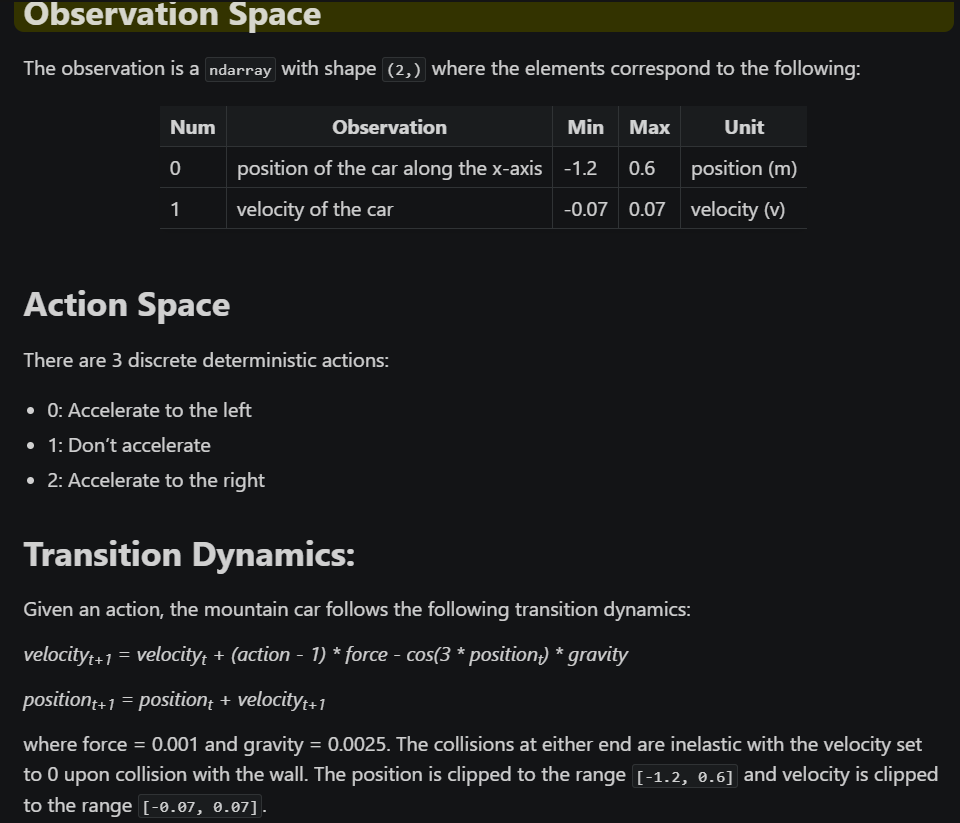

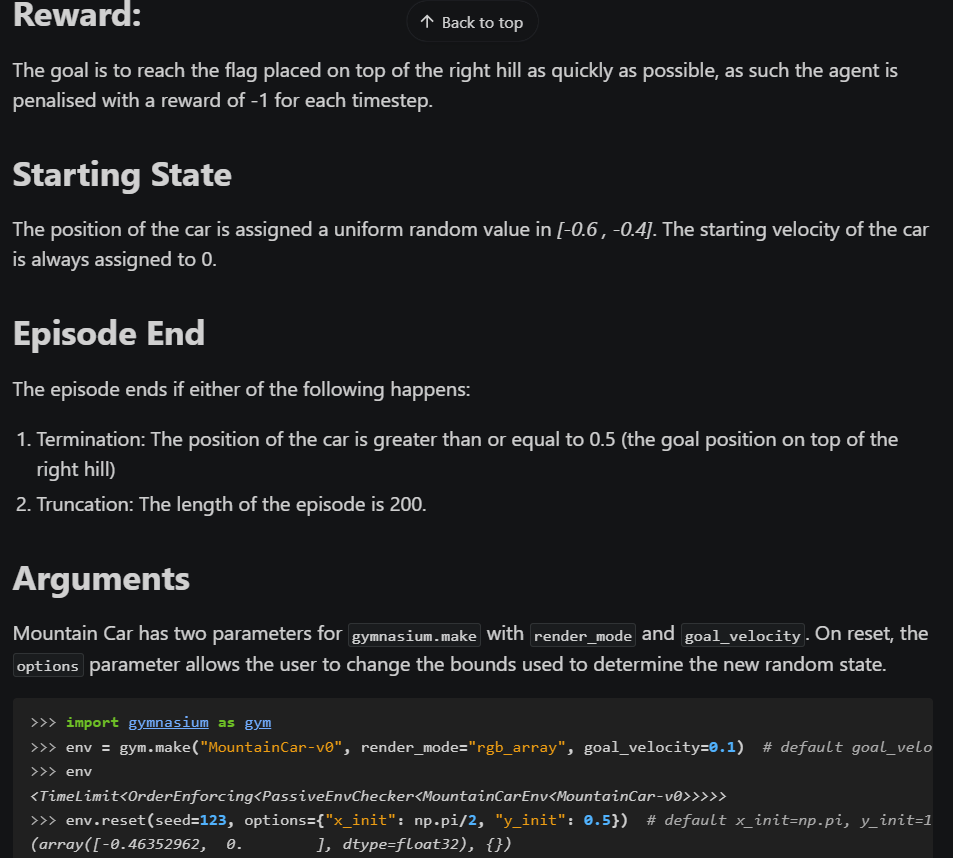

  5%|▌         | 1013/20000 [00:16<04:43, 67.01it/s]

Эпизод 1000: Средняя награда: -200.00, Успехов: 0


 10%|█         | 2008/20000 [00:33<05:55, 50.63it/s]

Эпизод 2000: Средняя награда: -200.00, Успехов: 0


 15%|█▌        | 3010/20000 [00:50<04:47, 59.11it/s]

Эпизод 3000: Средняя награда: -200.00, Успехов: 0


 20%|██        | 4011/20000 [01:08<04:26, 59.97it/s]

Эпизод 4000: Средняя награда: -200.00, Успехов: 0


 25%|██▌       | 5009/20000 [01:24<04:37, 54.08it/s]

Эпизод 5000: Средняя награда: -200.00, Успехов: 0


 30%|███       | 6014/20000 [01:41<03:31, 66.03it/s]

Эпизод 6000: Средняя награда: -200.00, Успехов: 0


 35%|███▌      | 7008/20000 [01:57<03:24, 63.58it/s]

Эпизод 7000: Средняя награда: -200.00, Успехов: 0


 40%|████      | 8009/20000 [02:14<03:24, 58.58it/s]

Эпизод 8000: Средняя награда: -200.00, Успехов: 0


 45%|████▌     | 9010/20000 [02:30<03:30, 52.31it/s]

Эпизод 9000: Средняя награда: -200.00, Успехов: 0


 50%|█████     | 10011/20000 [02:47<02:38, 62.97it/s]

Эпизод 10000: Средняя награда: -200.00, Успехов: 0


 55%|█████▌    | 11008/20000 [03:03<02:30, 59.87it/s]

Эпизод 11000: Средняя награда: -199.96, Успехов: 2


 60%|██████    | 12014/20000 [03:19<01:56, 68.62it/s]

Эпизод 12000: Средняя награда: -199.88, Успехов: 4


 65%|██████▌   | 13006/20000 [03:35<02:13, 52.53it/s]

Эпизод 13000: Средняя награда: -199.41, Успехов: 34


 70%|███████   | 14014/20000 [03:52<01:21, 73.11it/s]

Эпизод 14000: Средняя награда: -199.10, Успехов: 44


 75%|███████▌  | 15014/20000 [04:07<01:08, 72.89it/s]

Эпизод 15000: Средняя награда: -198.28, Успехов: 86


 80%|████████  | 16007/20000 [04:22<01:00, 66.26it/s]

Эпизод 16000: Средняя награда: -194.57, Успехов: 222


 85%|████████▌ | 17011/20000 [04:37<00:47, 63.40it/s]

Эпизод 17000: Средняя награда: -192.12, Успехов: 311


 90%|█████████ | 18010/20000 [04:51<00:26, 76.10it/s]

Эпизод 18000: Средняя награда: -189.69, Успехов: 403


 95%|█████████▌| 19009/20000 [05:05<00:14, 68.98it/s]

Эпизод 19000: Средняя награда: -180.96, Успехов: 636


100%|██████████| 20000/20000 [05:19<00:00, 62.60it/s]


Эпизод 20000: Средняя награда: -178.28, Успехов: 640


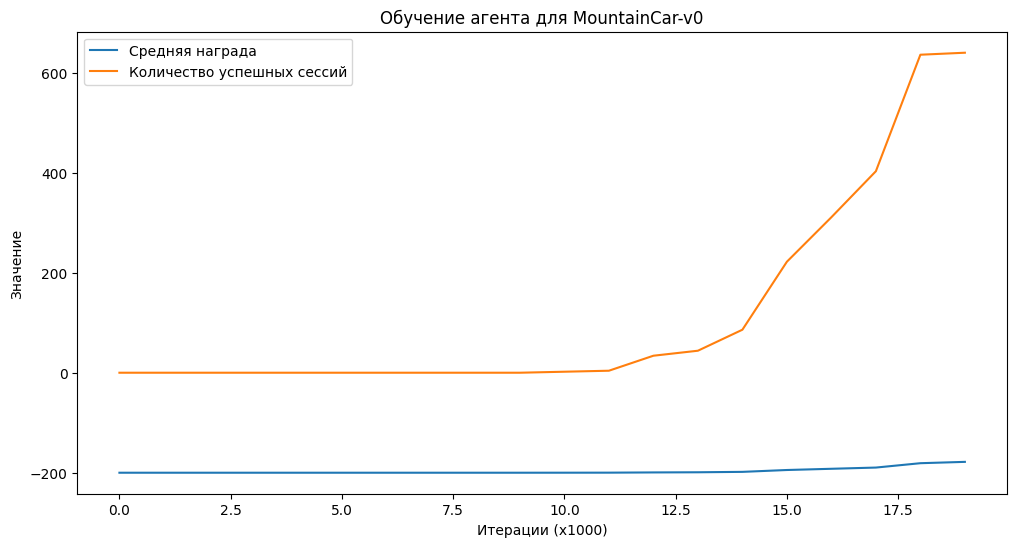

ValueError: ('Render mode is None, which is incompatible with RecordVideo.', 'Initialize your environment with a render_mode that returns an image, such as rgb_array.')

In [ ]:
@dataclass
class Config:
    discount: float = 0.99             # коэфф дисконт
    lr: float = 0.1
    epsilon: float = 1.0               # начальное значение epsilon
    final_epsilon: float = 0.1         # конечное значение epsilon
    n_episodes: int = 20_000
    print_every: int = 1_000
    n_bins: int = 20                   # кол-во окон для дискретизации
    max_steps: int = 200               # max число шагов в эпизоде


class QLearningAgent:
    def __init__(self, env: gym.Env, config: Config) -> None:
        self.env = env
        self.cfg = config
        # определяем диапазоны наблюдений (min и max)
        self.obs_space_low = self.env.observation_space.low
        self.obs_space_high = self.env.observation_space.high
        # дискретизация пространства состояний
        self.bins = [
            np.linspace(self.obs_space_low[i], self.obs_space_high[i], self.cfg.n_bins - 1) # создает линейный набор чисел от минимального до максимального значения для i-го измерения с шагом n_bins - 1
            for i in range(self.env.observation_space.shape[0])
        ] #  заполняет список self.bins этими массивами границ для всех измерений пространства состояний
        # Q-таблицa
        self.q_table = np.zeros(
            tuple(self.cfg.n_bins for _ in range(self.env.observation_space.shape[0]))
            + (self.env.action_space.n,)
        )

        self.epsilon = self.cfg.epsilon

    def discretize(self, state: np.ndarray) -> tuple:
        """
        Преобразование состояния в дискретную форму.
        """
        return tuple(
            np.digitize(state[i], self.bins[i]) for i in range(len(state)) # возвращает индекс соответствующего бинa для значения в виде кортежа
        )

    def _update_epsilon(self, episode: int) -> None:
        """
        Линейное уменьшение epsilon от начального до конечного значения.
        """
        self.epsilon = max(
            self.cfg.final_epsilon,
            self.cfg.epsilon - (self.cfg.epsilon - self.cfg.final_epsilon) * (episode / self.cfg.n_episodes),
        )

    def get_action(self, state: tuple) -> int:
        """
        Выбор действия по epsilon-greedy политике.
        """
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()  # случ действие
        else:
            return np.argmax(self.q_table[state])  # действие с максимальным Q-значением


    def update_q_table(
            self,
            state: np.ndarray | tuple,
            new_state: np.ndarray | tuple,
            reward: float, action: int,
            done: bool
        ) -> None:

        future_reward = 0 if done else np.max(self.q_table[new_state])
        self.q_table[state][action] += self.cfg.lr * (
            reward + self.cfg.discount * future_reward - self.q_table[state][action]
        )
        # self.q_table[player_sum, dealer_card, usable_ace, action] = (1 - self.cfg.lr) * current_q + self.cfg.lr * (reward + self.cfg.discount * future_reward

    def run_episode(self, episode: int) -> int:

        self._update_epsilon(episode)  # обновление epsilon
        state, _ = self.env.reset()
        state = self.discretize(state)
        total_reward = 0
        done = False

        for _ in range(self.cfg.max_steps):
            action = self.get_action(state)
            new_state, reward, terminated, truncated, _ = self.env.step(action)
            new_state = self.discretize(new_state) #
            done = terminated or truncated

            self.update_q_table(state, action, reward, new_state, done)
            state = new_state
            total_reward += reward

            if done:
                break

        return total_reward


    def train(self):
        rewards = []  # награды за эпизоды
        stats = {"avg_rewards": [], "successes": []}  # статистика

        for ep in tqdm(range(self.cfg.n_episodes)):
            reward = self.run_episode(ep)
            rewards.append(reward)

            # Сбор статистики каждые print_every эпизодов
            if (ep + 1) % self.cfg.print_every == 0:
                avg_reward = np.mean(rewards[-self.cfg.print_every:])
                successes = sum(r > -200 for r in rewards[-self.cfg.print_every:])  # успех = добраться до вершины

                stats["avg_rewards"].append(avg_reward)
                stats["successes"].append(successes)

                print(f"Эпизод {ep + 1}: Средняя награда: {avg_reward:.2f}, Успехов: {successes}")

        return rewards, stats


# Конфигурация
config = Config()
env = gym.make("MountainCar-v0", render_mode="rgb_array")
agent = QLearningAgent(env, config)

# Тренировка агента
rewards, stats = agent.train()

# Визуализация статистики
plt.figure(figsize=(12, 6))
plt.plot(stats["avg_rewards"], label="средняя награда")
plt.plot(stats["successes"], label="кол-во успешных сессий")
plt.xlabel("итерации (x1000)")
plt.ylabel("значение")
plt.legend()
plt.title("Динамика обучения агента для MountainCar-v0")
plt.show()

# Запись видео
from gymnasium.wrappers import RecordVideo
import os

video_folder = "./videos/"
if not os.path.exists(video_folder):
    os.makedirs(video_folder)
env = RecordVideo(env, video_folder=video_folder, episode_trigger=lambda x: x % 50000 == 0)

agent.env = env  # переключаем на обёрнутую среду

for _ in range(5):  # играем несколько эпизодов для записи
    agent.run_episode(0)

env.close()
print(f"Видео сохранено в директорию: {video_folder}")


  5%|▌         | 1012/20000 [00:16<04:54, 64.54it/s]

Эпизод 1000: Средняя награда: -200.00, Успехов: 0


 10%|█         | 2010/20000 [00:33<04:46, 62.82it/s]

Эпизод 2000: Средняя награда: -200.00, Успехов: 0


 15%|█▌        | 3008/20000 [00:50<05:55, 47.83it/s]

Эпизод 3000: Средняя награда: -200.00, Успехов: 0


 20%|██        | 4009/20000 [01:07<03:59, 66.69it/s]

Эпизод 4000: Средняя награда: -200.00, Успехов: 0


 25%|██▌       | 5009/20000 [01:23<04:16, 58.50it/s]

Эпизод 5000: Средняя награда: -200.00, Успехов: 0


 30%|███       | 6005/20000 [01:40<03:50, 60.77it/s]

Эпизод 6000: Средняя награда: -200.00, Успехов: 0


 35%|███▌      | 7008/20000 [01:57<03:15, 66.36it/s]

Эпизод 7000: Средняя награда: -200.00, Успехов: 0


 40%|████      | 8011/20000 [02:13<03:03, 65.36it/s]

Эпизод 8000: Средняя награда: -200.00, Успехов: 0


 45%|████▌     | 9008/20000 [02:29<02:37, 69.62it/s]

Эпизод 9000: Средняя награда: -200.00, Успехов: 0


 50%|█████     | 10011/20000 [02:45<02:40, 62.42it/s]

Эпизод 10000: Средняя награда: -200.00, Успехов: 0


 55%|█████▌    | 11008/20000 [03:01<02:48, 53.24it/s]

Эпизод 11000: Средняя награда: -200.00, Успехов: 1


 60%|██████    | 12010/20000 [03:18<02:02, 65.12it/s]

Эпизод 12000: Средняя награда: -199.97, Успехов: 4


 65%|██████▌   | 13010/20000 [03:33<01:51, 62.62it/s]

Эпизод 13000: Средняя награда: -199.60, Успехов: 18


 70%|███████   | 14012/20000 [03:49<01:27, 68.35it/s]

Эпизод 14000: Средняя награда: -199.38, Успехов: 36


 75%|███████▌  | 15011/20000 [04:04<01:07, 73.41it/s]

Эпизод 15000: Средняя награда: -197.44, Успехов: 114


 80%|████████  | 16013/20000 [04:19<01:00, 65.84it/s]

Эпизод 16000: Средняя награда: -195.13, Успехов: 197


 85%|████████▌ | 17005/20000 [04:35<00:59, 50.41it/s]

Эпизод 17000: Средняя награда: -191.67, Успехов: 328


 90%|█████████ | 18012/20000 [04:50<00:33, 59.68it/s]

Эпизод 18000: Средняя награда: -185.79, Успехов: 489


 95%|█████████▌| 19015/20000 [05:04<00:11, 84.59it/s]

Эпизод 19000: Средняя награда: -182.45, Успехов: 593


100%|██████████| 20000/20000 [05:17<00:00, 62.94it/s]


Эпизод 20000: Средняя награда: -175.06, Успехов: 698


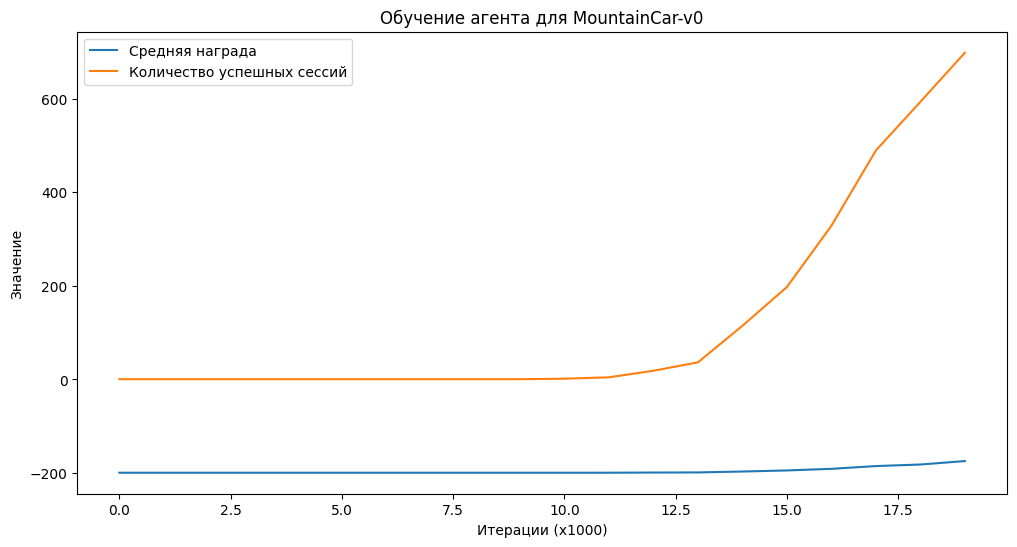

/usr/local/lib/python3.10/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Видео сохранено в папке './videos'.


In [ ]:

# Конфигурация
config = Config()
env = gym.make("MountainCar-v0", render_mode="rgb_array")
agent = QLearningAgent(env, config)

# Тренировка агента
rewards, stats = agent.train()

# Визуализация статистики
plt.figure(figsize=(12, 6))
plt.plot(stats["avg_rewards"], label="Средняя награда")
plt.plot(stats["successes"], label="Количество успешных сессий")
plt.xlabel("Итерации (x1000)")
plt.ylabel("Значение")
plt.legend()
plt.title("Обучение агента для MountainCar-v0")
plt.show()

# Запись видео
from gymnasium.wrappers import RecordVideo

env = RecordVideo(env, video_folder="./videos", episode_trigger=lambda x: x % 10000 == 0)
agent.env = env  # Переключаем на обёрнутую среду

for _ in range(5):  # Играем несколько эпизодов для записи
    agent.run_episode(0)

print("Видео сохранено в папке './videos'.")

In [ ]:
@dataclass
class Config:
    discount: float = 0.99             # Коэффициент дисконтирования
    lr: float = 0.1                    # Скорость обучения
    epsilon: float = 1.0               # Начальное значение epsilon
    final_epsilon: float = 0.1         # Конечное значение epsilon
    n_episodes: int = 120_000           # Количество эпизодов
    print_every: int = 1_000           # Интервал для вывода статистики
    n_bins: int = 20                   # Количество окон для дискретизации
    max_steps: int = 200               # Максимальное число шагов в эпизоде


# Конфигурация
config = Config()
env = gym.make("MountainCar-v0", render_mode="rgb_array")
agent = QLearningAgent(env, config)

# Тренировка агента
rewards, stats = agent.train()

# Визуализация статистики
plt.figure(figsize=(12, 6))
plt.plot(stats["avg_rewards"], label="Средняя награда")
plt.plot(stats["successes"], label="Количество успешных сессий")
plt.xlabel("Итерации (x1000)")
plt.ylabel("Значение")
plt.legend()
plt.title("Обучение агента для MountainCar-v0")
plt.show()

# Запись видео
from gymnasium.wrappers import RecordVideo

env = RecordVideo(env, video_folder="./videos", episode_trigger=lambda x: x % 10000 == 0)
agent.env = env  # Переключаем на обёрнутую среду

for _ in range(5):  # Играем несколько эпизодов для записи
    agent.run_episode(0)

print("Видео сохранено в папке './videos'.")

  1%|          | 1008/120000 [00:17<32:28, 61.06it/s]

Эпизод 1000: Средняя награда: -200.00, Успехов: 0


  2%|▏         | 2011/120000 [00:33<32:40, 60.18it/s]

Эпизод 2000: Средняя награда: -200.00, Успехов: 0


  3%|▎         | 3011/120000 [00:50<29:19, 66.49it/s]

Эпизод 3000: Средняя награда: -200.00, Успехов: 0


  3%|▎         | 4007/120000 [01:07<43:12, 44.74it/s]

Эпизод 4000: Средняя награда: -200.00, Успехов: 0


  4%|▍         | 5009/120000 [01:24<30:44, 62.33it/s]

Эпизод 5000: Средняя награда: -200.00, Успехов: 0


  5%|▌         | 6007/120000 [01:41<41:28, 45.81it/s]

Эпизод 6000: Средняя награда: -200.00, Успехов: 0


  6%|▌         | 7007/120000 [01:58<37:09, 50.67it/s]

Эпизод 7000: Средняя награда: -200.00, Успехов: 0


  7%|▋         | 8008/120000 [02:15<27:10, 68.68it/s]

Эпизод 8000: Средняя награда: -200.00, Успехов: 0


  8%|▊         | 9009/120000 [02:32<30:42, 60.22it/s]

Эпизод 9000: Средняя награда: -200.00, Успехов: 0


  8%|▊         | 10007/120000 [02:48<28:59, 63.22it/s]

Эпизод 10000: Средняя награда: -200.00, Успехов: 0


  9%|▉         | 11006/120000 [03:05<38:01, 47.78it/s]

Эпизод 11000: Средняя награда: -200.00, Успехов: 0


 10%|█         | 12012/120000 [03:21<28:14, 63.72it/s]

Эпизод 12000: Средняя награда: -200.00, Успехов: 0


 11%|█         | 13014/120000 [03:38<28:03, 63.55it/s]

Эпизод 13000: Средняя награда: -200.00, Успехов: 0


 12%|█▏        | 14008/120000 [03:54<26:39, 66.27it/s]

Эпизод 14000: Средняя награда: -200.00, Успехов: 0


 13%|█▎        | 15008/120000 [04:11<36:03, 48.54it/s]

Эпизод 15000: Средняя награда: -200.00, Успехов: 0


 13%|█▎        | 16010/120000 [04:28<27:21, 63.34it/s]

Эпизод 16000: Средняя награда: -200.00, Успехов: 0


 14%|█▍        | 17008/120000 [04:45<26:53, 63.85it/s]

Эпизод 17000: Средняя награда: -200.00, Успехов: 0


 15%|█▌        | 18009/120000 [05:01<30:20, 56.03it/s]

Эпизод 18000: Средняя награда: -200.00, Успехов: 0


 16%|█▌        | 19013/120000 [05:18<24:28, 68.75it/s]

Эпизод 19000: Средняя награда: -200.00, Успехов: 0


 17%|█▋        | 20007/120000 [05:34<25:35, 65.14it/s]

Эпизод 20000: Средняя награда: -200.00, Успехов: 0


 18%|█▊        | 21010/120000 [05:51<25:55, 63.64it/s]

Эпизод 21000: Средняя награда: -200.00, Успехов: 0


 18%|█▊        | 22010/120000 [06:07<27:22, 59.66it/s]

Эпизод 22000: Средняя награда: -200.00, Успехов: 0


 19%|█▉        | 23011/120000 [06:24<24:41, 65.46it/s]

Эпизод 23000: Средняя награда: -200.00, Успехов: 0


 20%|██        | 24008/120000 [06:41<24:51, 64.34it/s]

Эпизод 24000: Средняя награда: -200.00, Успехов: 0


 21%|██        | 25009/120000 [06:57<24:17, 65.17it/s]

Эпизод 25000: Средняя награда: -200.00, Успехов: 0


 22%|██▏       | 26008/120000 [07:14<29:55, 52.34it/s]

Эпизод 26000: Средняя награда: -200.00, Успехов: 0


 23%|██▎       | 27007/120000 [07:31<40:55, 37.87it/s]

Эпизод 27000: Средняя награда: -200.00, Успехов: 0


 23%|██▎       | 28006/120000 [07:48<24:09, 63.46it/s]

Эпизод 28000: Средняя награда: -200.00, Успехов: 0


 24%|██▍       | 29009/120000 [08:05<24:05, 62.94it/s]

Эпизод 29000: Средняя награда: -200.00, Успехов: 0


 25%|██▌       | 30014/120000 [08:21<22:14, 67.42it/s]

Эпизод 30000: Средняя награда: -200.00, Успехов: 0


 26%|██▌       | 31014/120000 [08:38<23:57, 61.91it/s]

Эпизод 31000: Средняя награда: -200.00, Успехов: 0


 27%|██▋       | 32006/120000 [08:54<26:05, 56.21it/s]

Эпизод 32000: Средняя награда: -200.00, Успехов: 0


 28%|██▊       | 33009/120000 [09:11<22:07, 65.52it/s]

Эпизод 33000: Средняя награда: -200.00, Успехов: 0


 28%|██▊       | 34010/120000 [09:27<24:53, 57.60it/s]

Эпизод 34000: Средняя награда: -200.00, Успехов: 0


 29%|██▉       | 35011/120000 [09:44<21:34, 65.65it/s]

Эпизод 35000: Средняя награда: -200.00, Успехов: 0


 30%|███       | 36008/120000 [10:01<21:27, 65.23it/s]

Эпизод 36000: Средняя награда: -200.00, Успехов: 0


 31%|███       | 37008/120000 [10:17<23:59, 57.67it/s]

Эпизод 37000: Средняя награда: -200.00, Успехов: 0


 32%|███▏      | 38005/120000 [10:34<25:37, 53.34it/s]

Эпизод 38000: Средняя награда: -200.00, Успехов: 0


 32%|███▏      | 38891/120000 [10:49<22:34, 59.88it/s]


KeyboardInterrupt: 

/usr/local/lib/python3.10/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
 10%|█         | 10009/100000 [01:50<19:54, 75.36it/s]

Эпизод 10000: Средняя награда: -100.00, Успехов: 10000


 20%|██        | 20012/100000 [03:41<13:15, 100.56it/s]

Эпизод 20000: Средняя награда: -100.00, Успехов: 10000


 30%|███       | 30013/100000 [05:29<12:57, 90.07it/s]

Эпизод 30000: Средняя награда: -100.00, Успехов: 10000


 40%|████      | 40019/100000 [07:18<09:27, 105.73it/s]

Эпизод 40000: Средняя награда: -100.00, Успехов: 10000


 50%|████▉     | 49999/100000 [09:05<07:47, 106.95it/s]

Эпизод 50000: Средняя награда: -100.00, Успехов: 10000


 60%|██████    | 60012/100000 [10:52<07:47, 85.49it/s]

Эпизод 60000: Средняя награда: -100.00, Успехов: 10000


 70%|███████   | 70009/100000 [12:42<07:30, 66.51it/s]

Эпизод 70000: Средняя награда: -100.00, Успехов: 10000


 80%|████████  | 80010/100000 [14:30<03:47, 87.72it/s] 

Эпизод 80000: Средняя награда: -100.00, Успехов: 10000


 90%|█████████ | 90013/100000 [16:16<01:35, 104.18it/s]

Эпизод 90000: Средняя награда: -100.00, Успехов: 10000


100%|██████████| 100000/100000 [18:01<00:00, 92.44it/s]


Эпизод 100000: Средняя награда: -100.00, Успехов: 10000


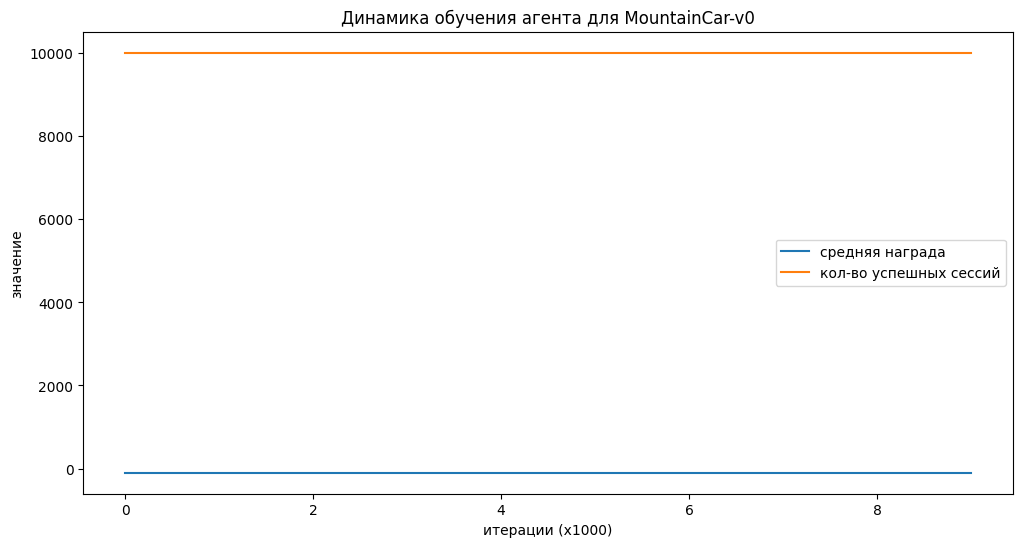

Видео сохранено в директорию: ./videos/


In [ ]:
@dataclass
class Config:
    discount: float = 0.95             # коэфф дисконт
    lr: float = 0.005
    epsilon: float = 1.0               # начальное значение epsilon
    final_epsilon: float = 0.3         # конечное значение epsilon
    n_episodes: int = 20_000
    print_every: int = 1_000
    n_bins: int = 20                   # кол-во окон для дискретизации
    max_steps: int = 200               # max число шагов в эпизоде

@dataclass
class Config:
    discount: float = 0.95             # коэфф дисконт
    lr: float = 0.0001
    epsilon: float = 1.0               # начальное значение epsilon
    final_epsilon: float = 0.3         # конечное значение epsilon
    n_episodes: int = 100_000
    print_every: int = 10_000
    n_bins: int = 10                   # кол-во окон для дискретизации
    max_steps: int = 100               # max число шагов в эпизоде



class QLearningAgent:
    def __init__(self, env: gym.Env, config: Config) -> None:
        self.env = env
        self.cfg = config
        # определяем диапазоны наблюдений (min и max)
        self.obs_space_low = self.env.observation_space.low
        self.obs_space_high = self.env.observation_space.high
        # дискретизация пространства состояний
        self.bins = [
            np.linspace(self.obs_space_low[i], self.obs_space_high[i], self.cfg.n_bins - 1) # создает линейный набор чисел от минимального до максимального значения для i-го измерения с шагом n_bins - 1
            for i in range(self.env.observation_space.shape[0])
        ] #  заполняет список self.bins этими массивами границ для всех измерений пространства состояний
        # Q-таблицa
        self.q_table = np.zeros(
            tuple(self.cfg.n_bins for _ in range(self.env.observation_space.shape[0]))
            + (self.env.action_space.n,)
        )

        self.epsilon = self.cfg.epsilon

    def discretize(self, state: np.ndarray) -> tuple:
        """
        Преобразование состояния в дискретную форму.
        """
        return tuple(
            np.digitize(state[i], self.bins[i]) for i in range(len(state)) # возвращает индекс соответствующего бинa для значения в виде кортежа
        )

    def _update_epsilon(self, episode: int) -> None:
        """
        Линейное уменьшение epsilon от начального до конечного значения.
        """
        self.epsilon = max(
            self.cfg.final_epsilon,
            self.cfg.epsilon - (self.cfg.epsilon - self.cfg.final_epsilon) * (episode / self.cfg.n_episodes),
        )

    def get_action(self, state: tuple) -> int:
        """
        Выбор действия по epsilon-greedy политике.
        """
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()  # случ действие
        else:
            return np.argmax(self.q_table[state])  # действие с максимальным Q-значением


    def update_q_table(
            self,
            state: np.ndarray | tuple,
            new_state: np.ndarray | tuple,
            reward: float, action: int,
            done: bool
        ) -> None:
        position, speed = state
        # next_player_sum, next_dealer_card, next_usable_ace = new_state
        future_reward = 0 if done else np.max(self.q_table[new_state])
        self.q_table[state, action] += self.cfg.lr * (
            reward + self.cfg.discount * future_reward - self.q_table[state, action]
        )
        # self.q_table[player_sum, dealer_card, usable_ace, action] = (1 - self.cfg.lr) * current_q + self.cfg.lr * (reward + self.cfg.discount * future_reward

    def run_episode(self, episode: int) -> int:

        self._update_epsilon(episode)  # обновление epsilon
        state, _ = self.env.reset()
        state = self.discretize(state)
        total_reward = 0
        done = False

        for _ in range(self.cfg.max_steps):
            action = self.get_action(state)
            new_state, reward, terminated, truncated, _ = self.env.step(action)
            new_state = self.discretize(new_state) #
            done = terminated or truncated

            self.update_q_table(state, action, reward, new_state, done)
            state = new_state
            total_reward += reward

            if done:
                break

        return total_reward


    def train(self):
        rewards = []  # награды за эпизоды
        stats = {"avg_rewards": [], "successes": []}  # статистика

        for ep in tqdm(range(self.cfg.n_episodes)):
            reward = self.run_episode(ep)
            rewards.append(reward)

            # Сбор статистики каждые print_every эпизодов
            if (ep + 1) % self.cfg.print_every == 0:
                avg_reward = np.mean(rewards[-self.cfg.print_every:])
                successes = sum(r > -200 for r in rewards[-self.cfg.print_every:])  # успех = добраться до вершины

                stats["avg_rewards"].append(avg_reward)
                stats["successes"].append(successes)

                print(f"Эпизод {ep + 1}: Средняя награда: {avg_reward:.2f}, Успехов: {successes}")

        return rewards, stats

from gymnasium.wrappers import RecordVideo
import os

# Конфигурация
config = Config()
env = gym.make("MountainCar-v0", render_mode="rgb_array")

video_folder = "./videos/"
if not os.path.exists(video_folder):
    os.makedirs(video_folder)
env = RecordVideo(env, video_folder=video_folder, episode_trigger=lambda x: x % 50000 == 0)

agent = QLearningAgent(env, config)

# Тренировка агента
rewards, stats = agent.train()

# Визуализация статистики
plt.figure(figsize=(12, 6))
plt.plot(stats["avg_rewards"], label="средняя награда")
plt.plot(stats["successes"], label="кол-во успешных сессий")
plt.xlabel("итерации (x1000)")
plt.ylabel("значение")
plt.legend()
plt.title("Динамика обучения агента для MountainCar-v0")
plt.show()


env.close()
print(f"Видео сохранено в директорию: {video_folder}")


  5%|▌         | 1007/20000 [00:21<05:56, 53.33it/s]

Эпизод 1000: Средняя награда: -200.00, Успехов: 0


 10%|█         | 2004/20000 [00:42<08:07, 36.90it/s]

Эпизод 2000: Средняя награда: -200.00, Успехов: 0


 15%|█▌        | 3006/20000 [01:03<05:12, 54.30it/s]

Эпизод 3000: Средняя награда: -200.00, Успехов: 0


 20%|██        | 4011/20000 [01:24<05:05, 52.34it/s]

Эпизод 4000: Средняя награда: -200.00, Успехов: 0


 25%|██▌       | 5006/20000 [01:44<05:01, 49.66it/s]

Эпизод 5000: Средняя награда: -200.00, Успехов: 0


 30%|███       | 6007/20000 [02:06<04:19, 53.88it/s]

Эпизод 6000: Средняя награда: -200.00, Успехов: 0


 35%|███▌      | 7005/20000 [02:28<06:12, 34.85it/s]

Эпизод 7000: Средняя награда: -200.00, Успехов: 0


 40%|████      | 8009/20000 [02:48<03:50, 52.05it/s]

Эпизод 8000: Средняя награда: -200.00, Успехов: 0


 45%|████▌     | 9004/20000 [03:09<03:33, 51.51it/s]

Эпизод 9000: Средняя награда: -200.00, Успехов: 0


 50%|█████     | 10010/20000 [03:29<02:59, 55.63it/s]

Эпизод 10000: Средняя награда: -200.00, Успехов: 0


 55%|█████▌    | 11007/20000 [03:50<03:02, 49.15it/s]

Эпизод 11000: Средняя награда: -200.00, Успехов: 0


 60%|██████    | 12005/20000 [04:11<02:34, 51.82it/s]

Эпизод 12000: Средняя награда: -200.00, Успехов: 0


 65%|██████▌   | 13008/20000 [04:33<02:08, 54.21it/s]

Эпизод 13000: Средняя награда: -200.00, Успехов: 0


 70%|███████   | 14005/20000 [04:53<02:44, 36.40it/s]

Эпизод 14000: Средняя награда: -200.00, Успехов: 0


 75%|███████▌  | 15008/20000 [05:14<01:43, 48.10it/s]

Эпизод 15000: Средняя награда: -200.00, Успехов: 0


 80%|████████  | 16006/20000 [05:35<01:12, 54.72it/s]

Эпизод 16000: Средняя награда: -200.00, Успехов: 0


 85%|████████▌ | 17005/20000 [05:55<00:56, 53.47it/s]

Эпизод 17000: Средняя награда: -200.00, Успехов: 0


 90%|█████████ | 18009/20000 [06:18<00:38, 51.42it/s]

Эпизод 18000: Средняя награда: -200.00, Успехов: 0


 95%|█████████▌| 19006/20000 [06:38<00:25, 38.44it/s]

Эпизод 19000: Средняя награда: -200.00, Успехов: 0


100%|██████████| 20000/20000 [06:59<00:00, 47.68it/s]


Эпизод 20000: Средняя награда: -200.00, Успехов: 0


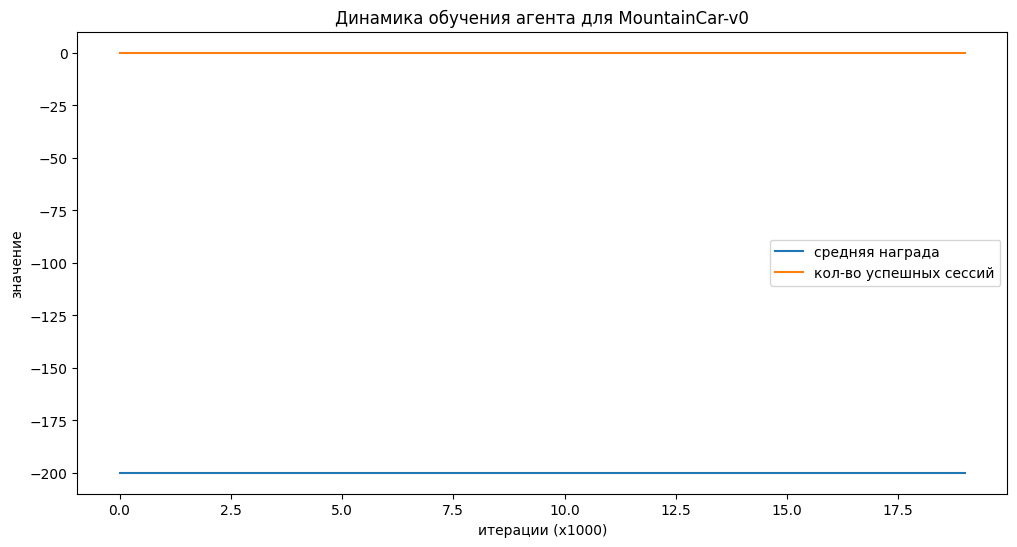

Видео сохранено в директорию: ./videos/


In [ ]:
@dataclass
class Config:
    discount: float = 0.99             # коэфф дисконт
    lr: float = 0.1
    epsilon: float = 1.0               # начальное значение epsilon
    final_epsilon: float = 0.1         # конечное значение epsilon
    n_episodes: int = 20_000
    print_every: int = 1_000
    n_bins: int = 20                   # кол-во окон для дискретизации
    max_steps: int = 200               # max число шагов в эпизоде


class QLearningAgent:
    def __init__(self, env: gym.Env, config: Config) -> None:
        self.env = env
        self.cfg = config
        # определяем диапазоны наблюдений (min и max)
        self.obs_space_low = self.env.observation_space.low
        self.obs_space_high = self.env.observation_space.high
        # дискретизация пространства состояний
        self.bins = [
            np.linspace(self.obs_space_low[i], self.obs_space_high[i], self.cfg.n_bins - 1) # создает линейный набор чисел от минимального до максимального значения для i-го измерения с шагом n_bins - 1
            for i in range(self.env.observation_space.shape[0])
        ] #  заполняет список self.bins этими массивами границ для всех измерений пространства состояний
        # Q-таблицa
        self.q_table = np.zeros(
            tuple(self.cfg.n_bins for _ in range(self.env.observation_space.shape[0]))
            + (self.env.action_space.n,)
        )

        self.epsilon = self.cfg.epsilon

    def discretize(self, state: np.ndarray) -> tuple:
        """
        Преобразование состояния в дискретную форму.
        """
        return tuple(
            np.digitize(state[i], self.bins[i]) for i in range(len(state)) # возвращает индекс соответствующего бинa для значения в виде кортежа
        )

    def _update_epsilon(self, episode: int) -> None:
        """
        Линейное уменьшение epsilon от начального до конечного значения.
        """
        self.epsilon = max(
            self.cfg.final_epsilon,
            self.cfg.epsilon - (self.cfg.epsilon - self.cfg.final_epsilon) * (episode / self.cfg.n_episodes),
        )

    def get_action(self, state: tuple) -> int:
        """
        Выбор действия по epsilon-greedy политике.
        """
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()  # случ действие
        else:
            return np.argmax(self.q_table[state])  # действие с максимальным Q-значением


    def update_q_table(
            self,
            state: np.ndarray | tuple,
            new_state: np.ndarray | tuple,
            reward: float, action: int,
            done: bool
        ) -> None:

        future_reward = 0 if done else np.max(self.q_table[new_state])
        self.q_table[state, action] += self.cfg.lr * (
            reward + self.cfg.discount * future_reward - self.q_table[state, action]
        )
        # self.q_table[player_sum, dealer_card, usable_ace, action] = (1 - self.cfg.lr) * current_q + self.cfg.lr * (reward + self.cfg.discount * future_reward

    def run_episode(self, episode: int) -> int:

        self._update_epsilon(episode)  # обновление epsilon
        state, _ = self.env.reset()
        state = self.discretize(state)
        total_reward = 0
        done = False

        for _ in range(self.cfg.max_steps):
            action = self.get_action(state)
            new_state, reward, terminated, truncated, _ = self.env.step(action)
            new_state = self.discretize(new_state) #
            done = terminated or truncated

            self.update_q_table(state, action, reward, new_state, done)
            state = new_state
            total_reward += reward

            if done:
                break

        return total_reward


    def train(self):
        rewards = []  # награды за эпизоды
        stats = {"avg_rewards": [], "successes": []}  # статистика

        for ep in tqdm(range(self.cfg.n_episodes)):
            reward = self.run_episode(ep)
            rewards.append(reward)

            # Сбор статистики каждые print_every эпизодов
            if (ep + 1) % self.cfg.print_every == 0:
                avg_reward = np.mean(rewards[-self.cfg.print_every:])
                successes = sum(r > -200 for r in rewards[-self.cfg.print_every:])  # успех = добраться до вершины

                stats["avg_rewards"].append(avg_reward)
                stats["successes"].append(successes)

                print(f"Эпизод {ep + 1}: Средняя награда: {avg_reward:.2f}, Успехов: {successes}")

        return rewards, stats


# Конфигурация
config = Config()
env = gym.make("MountainCar-v0", render_mode="rgb_array")
agent = QLearningAgent(env, config)

# Тренировка агента
rewards, stats = agent.train()

# Визуализация статистики
plt.figure(figsize=(12, 6))
plt.plot(stats["avg_rewards"], label="средняя награда")
plt.plot(stats["successes"], label="кол-во успешных сессий")
plt.xlabel("итерации (x1000)")
plt.ylabel("значение")
plt.legend()
plt.title("Динамика обучения агента для MountainCar-v0")
plt.show()

# Запись видео
from gymnasium.wrappers import RecordVideo
import os

video_folder = "./videos/"
if not os.path.exists(video_folder):
    os.makedirs(video_folder)
env = RecordVideo(env, video_folder=video_folder, episode_trigger=lambda x: x % 50000 == 0)

agent.env = env  # переключаем на обёрнутую среду

for _ in range(5):  # играем несколько эпизодов для записи
    agent.run_episode(0)

env.close()
print(f"Видео сохранено в директорию: {video_folder}")


  5%|▌         | 1008/20000 [00:16<04:26, 71.37it/s]

Эпизод 1000: Средняя награда: -200.00, Успехов: 0


 10%|█         | 2009/20000 [00:32<04:30, 66.43it/s]

Эпизод 2000: Средняя награда: -200.00, Успехов: 0


 15%|█▌        | 3008/20000 [00:48<04:33, 62.09it/s]

Эпизод 3000: Средняя награда: -200.00, Успехов: 0


 20%|██        | 4008/20000 [01:05<04:45, 55.94it/s]

Эпизод 4000: Средняя награда: -200.00, Успехов: 0


 25%|██▌       | 5006/20000 [01:21<04:22, 57.12it/s]

Эпизод 5000: Средняя награда: -200.00, Успехов: 0


 30%|███       | 6013/20000 [01:37<03:22, 69.22it/s]

Эпизод 6000: Средняя награда: -200.00, Успехов: 0


 35%|███▌      | 7008/20000 [01:53<03:17, 65.88it/s]

Эпизод 7000: Средняя награда: -200.00, Успехов: 0


 40%|████      | 8012/20000 [02:09<02:57, 67.64it/s]

Эпизод 8000: Средняя награда: -200.00, Успехов: 0


 45%|████▌     | 9008/20000 [02:25<03:19, 55.20it/s]

Эпизод 9000: Средняя награда: -200.00, Успехов: 0


 50%|█████     | 10012/20000 [02:41<02:28, 67.16it/s]

Эпизод 10000: Средняя награда: -200.00, Успехов: 0


 55%|█████▌    | 11011/20000 [02:56<01:57, 76.52it/s]

Эпизод 11000: Средняя награда: -199.99, Успехов: 1


 60%|██████    | 12008/20000 [03:12<02:01, 65.71it/s]

Эпизод 12000: Средняя награда: -199.92, Успехов: 3


 65%|██████▌   | 13008/20000 [03:27<01:42, 68.27it/s]

Эпизод 13000: Средняя награда: -199.71, Успехов: 18


 70%|███████   | 14012/20000 [03:42<01:33, 63.94it/s]

Эпизод 14000: Средняя награда: -198.48, Успехов: 74


 75%|███████▌  | 15008/20000 [03:58<01:33, 53.28it/s]

Эпизод 15000: Средняя награда: -196.40, Успехов: 146


 80%|████████  | 16008/20000 [04:13<00:54, 73.00it/s]

Эпизод 16000: Средняя награда: -195.00, Успехов: 219


 85%|████████▌ | 17009/20000 [04:27<00:44, 66.66it/s]

Эпизод 17000: Средняя награда: -189.64, Успехов: 371


 90%|█████████ | 18015/20000 [04:42<00:25, 79.19it/s]

Эпизод 18000: Средняя награда: -189.93, Успехов: 375


 95%|█████████▌| 19004/20000 [04:56<00:14, 68.43it/s]

Эпизод 19000: Средняя награда: -186.31, Успехов: 464


100%|██████████| 20000/20000 [05:09<00:00, 64.56it/s] 


Эпизод 20000: Средняя награда: -170.91, Успехов: 698


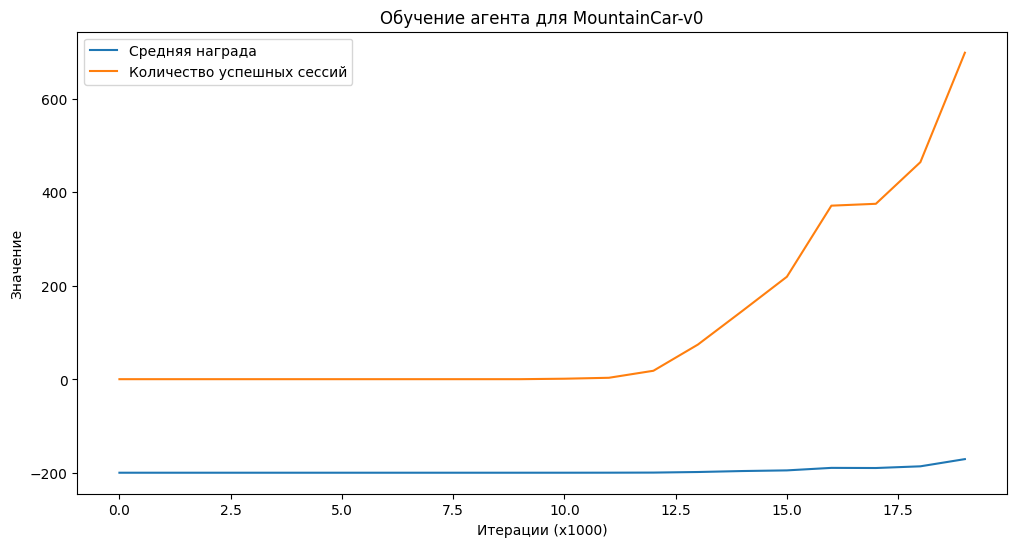

ValueError: ('Render mode is None, which is incompatible with RecordVideo.', 'Initialize your environment with a render_mode that returns an image, such as rgb_array.')

In [ ]:
## линейное изменение эпсилон

import numpy as np
import gymnasium as gym
from tqdm import tqdm
from dataclasses import dataclass
import matplotlib.pyplot as plt

@dataclass
class Config:
    discount: float = 0.99             # Коэффициент дисконтирования
    lr: float = 0.1                    # Скорость обучения
    epsilon: float = 1.0               # Начальное значение epsilon
    final_epsilon: float = 0.1         # Конечное значение epsilon
    n_episodes: int = 20_000           # Количество эпизодов
    print_every: int = 1_000           # Интервал для вывода статистики
    n_bins: int = 20                   # Количество окон для дискретизации
    max_steps: int = 200               # Максимальное число шагов в эпизоде


class QLearningAgent:
    def __init__(self, env: gym.Env, config: Config) -> None:
        self.env = env
        self.cfg = config

        # Определяем диапазоны наблюдений (min и max)
        self.obs_space_low = self.env.observation_space.low
        self.obs_space_high = self.env.observation_space.high

        # Дискретизация пространства состояний
        self.bins = [
            np.linspace(self.obs_space_low[i], self.obs_space_high[i], self.cfg.n_bins - 1)
            for i in range(self.env.observation_space.shape[0])
        ]

        # Инициализация Q-таблицы
        self.q_table = np.zeros(
            tuple(self.cfg.n_bins for _ in range(self.env.observation_space.shape[0]))
            + (self.env.action_space.n,)
        )

        self.epsilon = self.cfg.epsilon

    def discretize(self, state: np.ndarray) -> tuple:
        """
        Преобразование состояния в дискретную форму.
        """
        return tuple(
            np.digitize(state[i], self.bins[i]) for i in range(len(state))
        )

    def _update_epsilon(self, episode: int) -> None:
        """
        Линейное уменьшение epsilon от начального до конечного значения.
        """
        self.epsilon = max(
            self.cfg.final_epsilon,
            self.cfg.epsilon - (self.cfg.epsilon - self.cfg.final_epsilon) * (episode / self.cfg.n_episodes),
        )

    def get_action(self, state: tuple) -> int:
        """
        Выбор действия по epsilon-greedy политике.
        """
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()  # Случайное действие
        else:
            return np.argmax(self.q_table[state])  # Действие с максимальным Q-значением

    def update_q_table(self, state: tuple, action: int, reward: float, new_state: tuple, done: bool) -> None:
        """
        Обновление Q-таблицы.
        """
        future_reward = 0 if done else np.max(self.q_table[new_state])
        self.q_table[state][action] += self.cfg.lr * (
            reward + self.cfg.discount * future_reward - self.q_table[state][action]
        )

    def run_episode(self, episode: int) -> int:
        """
        Проведение одного эпизода. Возвращает итоговую награду.
        """
        self._update_epsilon(episode)  # Обновление epsilon
        state, _ = self.env.reset()
        state = self.discretize(state)

        total_reward = 0
        for _ in range(self.cfg.max_steps):
            action = self.get_action(state)
            new_state, reward, terminated, truncated, _ = self.env.step(action)
            new_state = self.discretize(new_state)
            done = terminated or truncated

            self.update_q_table(state, action, reward, new_state, done)
            state = new_state
            total_reward += reward

            if done:
                break

        return total_reward

    def train(self):
        """
        Тренировка агента.
        """
        rewards = []  # Награды за эпизоды
        stats = {"avg_rewards": [], "successes": []}  # Статистика

        for ep in tqdm(range(self.cfg.n_episodes)):
            reward = self.run_episode(ep)
            rewards.append(reward)

            # Сбор статистики каждые print_every эпизодов
            if (ep + 1) % self.cfg.print_every == 0:
                avg_reward = np.mean(rewards[-self.cfg.print_every:])
                successes = sum(r > -200 for r in rewards[-self.cfg.print_every:])  # Успех = добраться до вершины
                stats["avg_rewards"].append(avg_reward)
                stats["successes"].append(successes)

                print(f"Эпизод {ep + 1}: Средняя награда: {avg_reward:.2f}, Успехов: {successes}")

        return rewards, stats


# Конфигурация
config = Config()
env = gym.make("MountainCar-v0")
agent = QLearningAgent(env, config)

# Тренировка агента
rewards, stats = agent.train()

# Визуализация статистики
plt.figure(figsize=(12, 6))
plt.plot(stats["avg_rewards"], label="Средняя награда")
plt.plot(stats["successes"], label="Количество успешных сессий")
plt.xlabel("Итерации (x1000)")
plt.ylabel("Значение")
plt.legend()
plt.title("Обучение агента для MountainCar-v0")
plt.show()

# Запись видео
from gymnasium.wrappers import RecordVideo

env = RecordVideo(env, video_folder="./videos", episode_trigger=lambda x: x % 1000 == 0)
agent.env = env  # Переключаем на обёрнутую среду

for _ in range(5):  # Играем несколько эпизодов для записи
    agent.run_episode(0)

print("Видео сохранено в папке './videos'.")


#### первое обучение

 10%|█         | 10008/100000 [02:22<23:58, 62.58it/s]

Эпизод 10000: Средняя награда: -187.78, Успехов: 4007


 20%|██        | 20015/100000 [04:16<13:44, 97.05it/s]

Эпизод 20000: Средняя награда: -152.12, Успехов: 9661


 30%|███       | 30008/100000 [06:06<15:40, 74.41it/s]

Эпизод 30000: Средняя награда: -149.23, Успехов: 8981


 40%|████      | 40021/100000 [07:47<09:24, 106.32it/s]

Эпизод 40000: Средняя награда: -137.07, Успехов: 9919


 50%|█████     | 50009/100000 [09:44<09:53, 84.21it/s]

Эпизод 50000: Средняя награда: -153.87, Успехов: 7565


 60%|██████    | 60009/100000 [11:33<08:10, 81.56it/s]

Эпизод 60000: Средняя награда: -148.25, Успехов: 8133


 70%|███████   | 70015/100000 [13:32<06:28, 77.09it/s]

Эпизод 70000: Средняя награда: -160.07, Успехов: 6158


 80%|████████  | 80016/100000 [15:43<03:00, 110.50it/s]

Эпизод 80000: Средняя награда: -176.60, Успехов: 3608


 90%|█████████ | 90012/100000 [17:26<02:29, 66.73it/s]

Эпизод 90000: Средняя награда: -141.54, Успехов: 8670


100%|██████████| 100000/100000 [19:33<00:00, 85.22it/s]


Эпизод 100000: Средняя награда: -176.68, Успехов: 3993


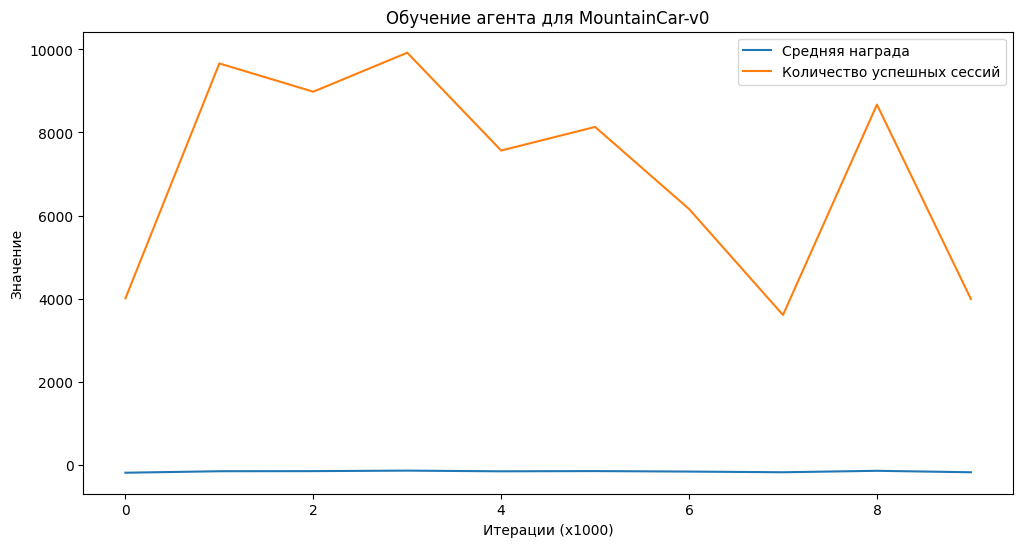

Видео сохранено в папке './videos'.


In [ ]:
## экспоненциальное изменение эпсилон (без явного огр.)

import numpy as np
import gymnasium as gym
from tqdm import tqdm
from dataclasses import dataclass
import matplotlib.pyplot as plt

@dataclass
class Config:
    discount: float = 0.99             # Коэффициент дисконтирования
    lr: float = 0.1                    # Скорость обучения
    epsilon: float = 1.0               # Начальное значение epsilon
    final_epsilon: float = 0.1         # Конечное значение epsilon
    n_episodes: int = 20_000           # Количество эпизодов
    print_every: int = 1_000           # Интервал для вывода статистики
    n_bins: int = 20                   # Количество окон для дискретизации
    max_steps: int = 200               # Максимальное число шагов в эпизоде

@dataclass
class Config:
    discount: float = 0.99             # Коэффициент дисконтирования (оставляем как есть)
    lr: float = 0.05                   # Уменьшаем скорость обучения для долгосрочной стабильности
    epsilon: float = 1.0               # Начальное значение epsilon
    final_epsilon: float = 0.01        # Конечное значение epsilon (уменьшаем для лучшего исследования)
    n_episodes: int = 100_000          # Количество эпизодов
    print_every: int = 10_000          # Увеличиваем интервал вывода статистики
    n_bins: int = 30                   # Увеличиваем количество дискретизационных окон для более точного обучения
    max_steps: int = 300               # Увеличиваем количество шагов в эпизоде


class QLearningAgent:
    def __init__(self, env: gym.Env, config: Config) -> None:
        self.env = env
        self.cfg = config

        # Определяем диапазоны наблюдений (min и max)
        self.obs_space_low = self.env.observation_space.low
        self.obs_space_high = self.env.observation_space.high

        # Дискретизация пространства состояний
        self.bins = [
            np.linspace(self.obs_space_low[i], self.obs_space_high[i], self.cfg.n_bins - 1)
            for i in range(self.env.observation_space.shape[0])
        ] # создаёт список массивов для дискретизации каждого измерения пространства состояний. генерирует массив
         # равномерно распределённых чисел между min и max значениями наблюдения для каждого измерения. kол-во интервалов задаётся параметром n_bins

        # Инициализация Q-таблицы
        self.q_table = np.zeros(
            tuple(self.cfg.n_bins for _ in range(self.env.observation_space.shape[0]))
            + (self.env.action_space.n,)
        ) # многомерный массив для хранения значений Q-функции. pазмер зависит от кол-ва бинов для каждого измерения пространства состояний и кол-ва возможных действий
        # пример, если есть 10 бинов для каждого из двух измерений состояния и 4 возможных действия, размер таблицы будет (10, 10, 4)

        self.epsilon = self.cfg.epsilon

    def discretize(self, state: np.ndarray) -> tuple:
        """
        Преобразование состояния в дискретную форму.
        """
        return tuple(
            np.digitize(state[i], self.bins[i]) for i in range(len(state))
        ) # для каждого измерения используется функция np.digitize, чтобы определить, в какой бин попадает текущее значение состояния.возвращает индекс бина, в котором находится данное значение
          # discretize берёт непрерывное состояние, разбивает его на отдельные компоненты (измерения),
# и затем для каждого компонента находит соответствующий ему дискретный индекс в предварительно созданных бинах. затем индексы собираются в кортеж tuple(...).

    def _update_epsilon(self, episode: int) -> None:
        self.epsilon = self.cfg.final_epsilon + (self.cfg.epsilon - self.cfg.final_epsilon) * np.exp(-0.001 * episode)
        ### разница между начальным и конечным значением epsilon умножается на экспоненту, а результат добавляется к конечному значению

    def get_action(self, state: tuple) -> int:
        """
        Выбор действия по epsilon-greedy политике.
        """
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()  # Случайное действие
        else:
            return np.argmax(self.q_table[state])  # Действие с максимальным Q-значением

    def update_q_table(self, state: tuple, action: int, reward: float, new_state: tuple, done: bool) -> None:
        """
        Обновление Q-таблицы.
        """
        future_reward = 0 if done else np.max(self.q_table[new_state])
        self.q_table[state][action] += self.cfg.lr * (
            reward + self.cfg.discount * future_reward - self.q_table[state][action]
        )

    def run_episode(self, episode: int) -> int:
        """
        Проведение одного эпизода. Возвращает итоговую награду.
        """
        self._update_epsilon(episode)  # Обновление epsilon
        state, _ = self.env.reset()
        state = self.discretize(state)  ###

        total_reward = 0
        for _ in range(self.cfg.max_steps):
            action = self.get_action(state)
            new_state, reward, terminated, truncated, _ = self.env.step(action)
            new_state = self.discretize(new_state)  ###
            done = terminated or truncated

            self.update_q_table(state, action, reward, new_state, done)
            state = new_state
            total_reward += reward

            if done:
                break

        return total_reward

    def train(self):
        """
        Тренировка агента.
        """
        rewards = []  # Награды за эпизоды
        stats = {"avg_rewards": [], "successes": []}  # Статистика

        for ep in tqdm(range(self.cfg.n_episodes)):
            reward = self.run_episode(ep)
            rewards.append(reward)

            # Сбор статистики каждые print_every эпизодов
            if (ep + 1) % self.cfg.print_every == 0:
                avg_reward = np.mean(rewards[-self.cfg.print_every:])
                successes = sum(r > -200 for r in rewards[-self.cfg.print_every:])  # Успех = добраться до вершины
                stats["avg_rewards"].append(avg_reward)
                stats["successes"].append(successes)

                print(f"Эпизод {ep + 1}: Средняя награда: {avg_reward:.2f}, Успехов: {successes}")

        return rewards, stats


# Конфигурация
config = Config()
env = gym.make("MountainCar-v0", render_mode="rgb_array")
agent = QLearningAgent(env, config)

# Тренировка агента
rewards, stats = agent.train()

# Визуализация статистики
plt.figure(figsize=(12, 6))
plt.plot(stats["avg_rewards"], label="Средняя награда")
plt.plot(stats["successes"], label="Количество успешных сессий")
plt.xlabel("Итерации (x1000)")
plt.ylabel("Значение")
plt.legend()
plt.title("Обучение агента для MountainCar-v0")
plt.show()

# Запись видео
from gymnasium.wrappers import RecordVideo

env = RecordVideo(env, video_folder="./videos", episode_trigger=lambda x: x % 1000 == 0)
agent.env = env  # Переключаем на обёрнутую среду

for _ in range(5):  # Играем несколько эпизодов для записи
    agent.run_episode(0)

print("Видео сохранено в папке './videos'.")


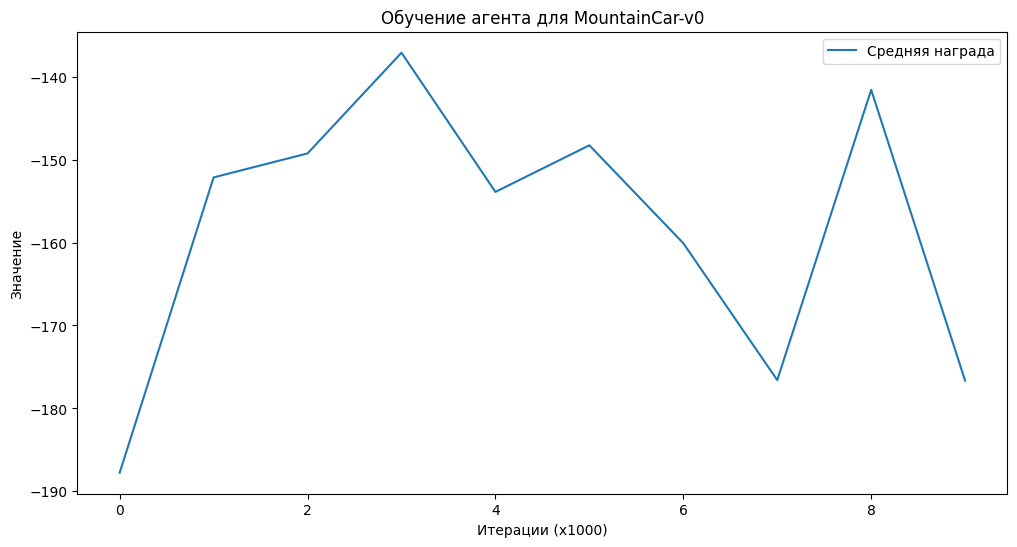

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(stats["avg_rewards"], label="Средняя награда")
plt.xlabel("Итерации (x1000)")
plt.ylabel("Значение")
plt.legend()
plt.title("Обучение агента для MountainCar-v0")
plt.show()

#### Обучение с 100_00 эпох

 10%|█         | 10015/100000 [02:42<20:03, 74.78it/s]

Эпизод 10000: Средняя награда: -200.00, Успехов: 0


 20%|██        | 20011/100000 [05:10<17:48, 74.84it/s]

Эпизод 20000: Средняя награда: -195.94, Успехов: 1830


 30%|███       | 30011/100000 [07:21<14:16, 81.72it/s]

Эпизод 30000: Средняя награда: -174.93, Успехов: 7718


 40%|████      | 40013/100000 [09:16<10:47, 92.59it/s]

Эпизод 40000: Средняя награда: -156.21, Успехов: 9582


 50%|█████     | 50012/100000 [11:04<07:21, 113.12it/s]

Эпизод 50000: Средняя награда: -148.61, Успехов: 9672


 60%|██████    | 60018/100000 [12:41<05:38, 118.28it/s]

Эпизод 60000: Средняя награда: -135.94, Успехов: 9926


 70%|███████   | 70009/100000 [14:19<05:50, 85.49it/s]

Эпизод 70000: Средняя награда: -135.88, Успехов: 9795


 80%|████████  | 80014/100000 [15:54<04:41, 71.01it/s]

Эпизод 80000: Средняя награда: -130.87, Успехов: 9940


 90%|█████████ | 90013/100000 [17:34<01:38, 101.39it/s]

Эпизод 90000: Средняя награда: -139.91, Успехов: 9866


100%|██████████| 100000/100000 [19:08<00:00, 87.05it/s] 


Эпизод 100000: Средняя награда: -130.98, Успехов: 9937


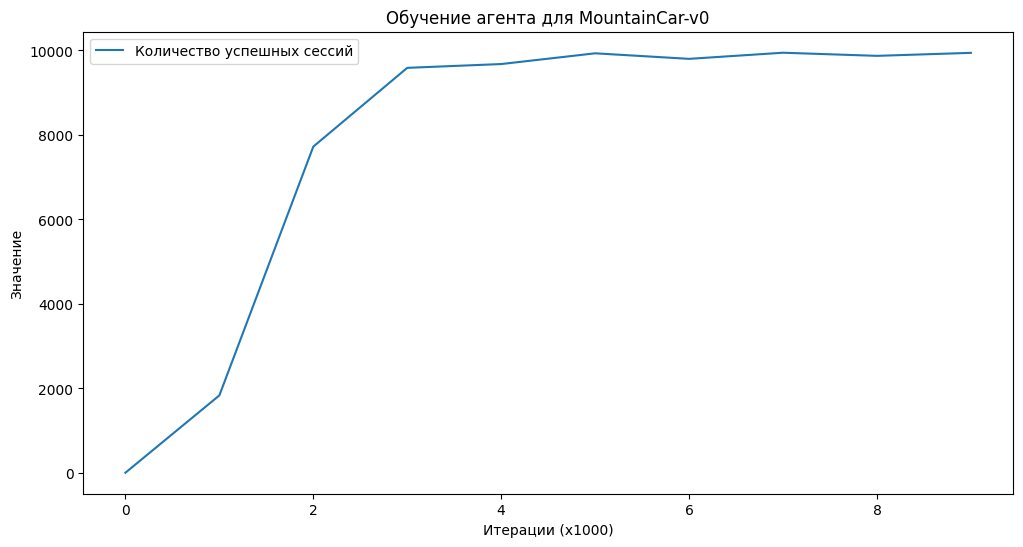

/usr/local/lib/python3.10/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Видео сохранено в папке './videos'.


In [ ]:
## экспоненциальное затухание эпсилон через max

@dataclass
class Config:
    discount: float = 0.99
    lr: float = 0.1                    # другая скорость обучения (х2)
    epsilon: float = 1.0
    final_epsilon: float = 0.05        # Более высокое минимальное epsilon
    n_episodes: int = 100_000
    print_every: int = 10_000
    n_bins: int = 50                   # Увеличение количества окон для дискретизации
    max_steps: int = 300


class QLearningAgent:
    def __init__(self, env: gym.Env, config: Config) -> None:
        self.env = env
        self.cfg = config

        # Определяем диапазоны наблюдений (min и max)
        self.obs_space_low = self.env.observation_space.low
        self.obs_space_high = self.env.observation_space.high

        # Дискретизация пространства состояний
        self.bins = [
            np.linspace(self.obs_space_low[i], self.obs_space_high[i], self.cfg.n_bins - 1)
            for i in range(self.env.observation_space.shape[0])
        ]

        # Инициализация Q-таблицы
        self.q_table = np.zeros(
            tuple(self.cfg.n_bins for _ in range(self.env.observation_space.shape[0]))
            + (self.env.action_space.n,)
        )

        self.epsilon = self.cfg.epsilon

    def discretize(self, state: np.ndarray) -> tuple:
        """
        Преобразование состояния в дискретную форму.
        """
        return tuple(
            np.digitize(state[i], self.bins[i]) for i in range(len(state))
        )

    def _update_epsilon(self, episode: int) -> None:
        #self.epsilon = self.cfg.final_epsilon + (self.cfg.epsilon - self.cfg.final_epsilon) * np.exp(-0.001 * episode)

        decay_rate = 0.00005 # определяет скорость убывания epsilon. Чем больше это значение, тем быстрее epsilon приближается к своему min значению.
        self.epsilon = max( #  max гарантирует, что epsilon никогда не станет меньше final_epsilon. это предотвращает слишком быстрое снижение epsilon ниже допустимого уровня.
            self.cfg.final_epsilon,
            self.cfg.epsilon * np.exp(-decay_rate * episode) # по мере увеличения episode, значение exp(-decay_rate * episode) стремится к нулю, уменьшая epsilon.
        )


    def get_action(self, state: tuple) -> int:
        """
        Выбор действия по epsilon-greedy политике.
        """
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()  # Случайное действие
        else:
            return np.argmax(self.q_table[state])  # Действие с максимальным Q-значением

    def update_q_table(self, state: tuple, action: int, reward: float, new_state: tuple, done: bool) -> None:
        """
        Обновление Q-таблицы.
        """
        future_reward = 0 if done else np.max(self.q_table[new_state])
        self.q_table[state][action] += self.cfg.lr * (
            reward + self.cfg.discount * future_reward - self.q_table[state][action]
        )

        #dynamic_lr = self.cfg.lr / (1 + 0.0001 * episode)  # Уменьшаем скорость обучения
        #future_reward = 0 if done else np.max(self.q_table[new_state])
        #self.q_table[state][action] += dynamic_lr * (
        #    reward + self.cfg.discount * future_reward - self.q_table[state][action]
        #)


    def run_episode(self, episode: int) -> int:
        """
        Проведение одного эпизода. Возвращает итоговую награду.
        """
        self._update_epsilon(episode)  # Обновление epsilon
        state, _ = self.env.reset()
        state = self.discretize(state)

        total_reward = 0
        for _ in range(self.cfg.max_steps):
            action = self.get_action(state)
            new_state, reward, terminated, truncated, _ = self.env.step(action)
            new_state = self.discretize(new_state)
            done = terminated or truncated

            self.update_q_table(state, action, reward, new_state, done)
            state = new_state
            total_reward += reward

            if done:
                break

        return total_reward

    def train(self):
        """
        Тренировка агента.
        """
        rewards = []  # Награды за эпизоды
        stats = {"avg_rewards": [], "successes": []}  # Статистика

        for ep in tqdm(range(self.cfg.n_episodes)):
            reward = self.run_episode(ep)
            rewards.append(reward)

            # Сбор статистики каждые print_every эпизодов
            if (ep + 1) % self.cfg.print_every == 0:
                avg_reward = np.mean(rewards[-self.cfg.print_every:])
                successes = sum(r > -200 for r in rewards[-self.cfg.print_every:])  # Успех = добраться до вершины
                stats["avg_rewards"].append(avg_reward)
                stats["successes"].append(successes)

                print(f"Эпизод {ep + 1}: Средняя награда: {avg_reward:.2f}, Успехов: {successes}")

        return rewards, stats


# Конфигурация
config = Config()
env = gym.make("MountainCar-v0", render_mode="rgb_array")
agent = QLearningAgent(env, config)

# Тренировка агента
rewards, stats = agent.train()

# Визуализация статистики
plt.figure(figsize=(12, 6))
plt.plot(stats["successes"], label="Количество успешных сессий")
plt.xlabel("Итерации (x1000)")
plt.ylabel("Значение")
plt.legend()
plt.title("Обучение агента для MountainCar-v0")
plt.show()

# Запись видео
from gymnasium.wrappers import RecordVideo

env = RecordVideo(env, video_folder="./videos", episode_trigger=lambda x: x % 1000 == 0)
agent.env = env  # Переключаем на обёрнутую среду

for _ in range(5):  # Играем несколько эпизодов для записи
    agent.run_episode(0)

print("Видео сохранено в папке './videos'.")


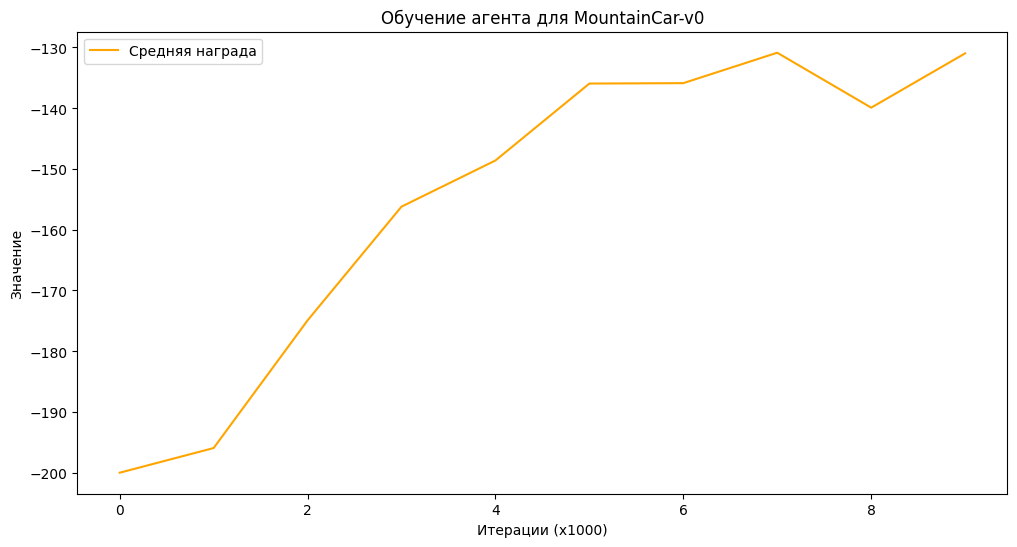

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(stats["avg_rewards"], label="Средняя награда", c = 'orange')
plt.xlabel("Итерации (x1000)")
plt.ylabel("Значение")
plt.legend()
plt.title("Обучение агента для MountainCar-v0")
plt.show()

#### Основное обучение

  2%|▏         | 10008/500000 [02:37<2:08:25, 63.59it/s]

Эпизод 10000: Средняя награда: -200.00, Успехов: 0


  4%|▍         | 20015/500000 [05:06<1:49:35, 73.00it/s]

Эпизод 20000: Средняя награда: -195.99, Успехов: 1773


  6%|▌         | 30007/500000 [07:19<1:58:18, 66.21it/s]

Эпизод 30000: Средняя награда: -176.32, Успехов: 7593


  8%|▊         | 40012/500000 [09:14<1:17:28, 98.96it/s] 

Эпизод 40000: Средняя награда: -155.14, Успехов: 9546


 10%|█         | 50020/500000 [11:03<1:09:32, 107.85it/s]

Эпизод 50000: Средняя награда: -146.75, Успехов: 9776


 12%|█▏        | 60021/500000 [12:47<1:06:42, 109.92it/s]

Эпизод 60000: Средняя награда: -142.07, Успехов: 9793


 14%|█▍        | 70024/500000 [14:24<1:01:48, 115.94it/s]

Эпизод 70000: Средняя награда: -133.06, Успехов: 9948


 16%|█▌        | 80012/500000 [16:01<1:48:11, 64.70it/s]

Эпизод 80000: Средняя награда: -132.73, Успехов: 9918


 18%|█▊        | 90014/500000 [17:39<1:03:16, 107.99it/s]

Эпизод 90000: Средняя награда: -134.48, Успехов: 9896


 20%|██        | 100021/500000 [19:18<1:09:51, 95.43it/s]

Эпизод 100000: Средняя награда: -132.13, Успехов: 9952


 22%|██▏       | 110016/500000 [20:55<58:10, 111.72it/s]

Эпизод 110000: Средняя награда: -134.21, Успехов: 9943


 24%|██▍       | 120012/500000 [22:35<1:06:22, 95.41it/s]

Эпизод 120000: Средняя награда: -134.47, Успехов: 9929


 26%|██▌       | 130021/500000 [24:07<51:59, 118.60it/s]

Эпизод 130000: Средняя награда: -127.90, Успехов: 9992


 28%|██▊       | 140012/500000 [25:47<57:08, 105.01it/s]

Эпизод 140000: Средняя награда: -135.18, Успехов: 9864


 30%|███       | 150015/500000 [27:23<44:37, 130.69it/s]

Эпизод 150000: Средняя награда: -132.22, Успехов: 9917


 32%|███▏      | 160011/500000 [29:01<52:56, 107.02it/s]

Эпизод 160000: Средняя награда: -132.71, Успехов: 9873


 34%|███▍      | 170019/500000 [30:39<51:25, 106.96it/s]

Эпизод 170000: Средняя награда: -136.35, Успехов: 9804


 36%|███▌      | 180015/500000 [32:17<53:41, 99.33it/s] 

Эпизод 180000: Средняя награда: -133.98, Успехов: 9874


 38%|███▊      | 190011/500000 [33:53<1:01:42, 83.72it/s]

Эпизод 190000: Средняя награда: -131.49, Успехов: 9936


 40%|████      | 200012/500000 [35:33<44:10, 113.20it/s]

Эпизод 200000: Средняя награда: -136.65, Успехов: 9865


 42%|████▏     | 210014/500000 [37:07<46:00, 105.06it/s]

Эпизод 210000: Средняя награда: -127.60, Успехов: 9967


 44%|████▍     | 220017/500000 [38:43<45:14, 103.13it/s]

Эпизод 220000: Средняя награда: -131.98, Успехов: 9961


 46%|████▌     | 230015/500000 [40:18<49:52, 90.21it/s]

Эпизод 230000: Средняя награда: -130.72, Успехов: 9899


 48%|████▊     | 240015/500000 [41:53<49:04, 88.29it/s]

Эпизод 240000: Средняя награда: -130.60, Успехов: 9934


 50%|█████     | 250014/500000 [43:37<35:48, 116.35it/s]

Эпизод 250000: Средняя награда: -136.23, Успехов: 9951


 52%|█████▏    | 260007/500000 [45:14<46:00, 86.92it/s]

Эпизод 260000: Средняя награда: -132.62, Успехов: 9879


 54%|█████▍    | 270013/500000 [46:51<34:31, 111.05it/s]

Эпизод 270000: Средняя награда: -133.26, Успехов: 9913


 56%|█████▌    | 280009/500000 [48:33<32:58, 111.19it/s]

Эпизод 280000: Средняя награда: -137.36, Успехов: 9863


 58%|█████▊    | 290013/500000 [50:05<30:34, 114.47it/s]

Эпизод 290000: Средняя награда: -125.31, Успехов: 9978


 60%|██████    | 300014/500000 [51:42<27:43, 120.24it/s]

Эпизод 300000: Средняя награда: -133.98, Успехов: 9868


 62%|██████▏   | 310011/500000 [53:21<32:15, 98.18it/s]

Эпизод 310000: Средняя награда: -133.99, Успехов: 9914


 64%|██████▍   | 320021/500000 [54:53<25:48, 116.26it/s]

Эпизод 320000: Средняя награда: -126.25, Успехов: 9981


 66%|██████▌   | 330016/500000 [56:35<26:06, 108.51it/s]

Эпизод 330000: Средняя награда: -138.73, Успехов: 9923


 68%|██████▊   | 340008/500000 [58:08<28:51, 92.41it/s] 

Эпизод 340000: Средняя награда: -127.56, Успехов: 9992


 70%|███████   | 350014/500000 [59:46<22:56, 108.96it/s]

Эпизод 350000: Средняя награда: -133.20, Успехов: 9922


 72%|███████▏  | 360011/500000 [1:01:19<27:59, 83.34it/s]

Эпизод 360000: Средняя награда: -127.18, Успехов: 9948


 74%|███████▍  | 370023/500000 [1:02:56<18:06, 119.59it/s]

Эпизод 370000: Средняя награда: -132.77, Успехов: 9909


 76%|███████▌  | 380010/500000 [1:04:35<24:03, 83.10it/s]

Эпизод 380000: Средняя награда: -134.73, Успехов: 9924


 78%|███████▊  | 390019/500000 [1:06:10<15:31, 118.11it/s]

Эпизод 390000: Средняя награда: -129.99, Успехов: 9964


 80%|████████  | 400009/500000 [1:07:49<18:30, 90.06it/s]

Эпизод 400000: Средняя награда: -136.06, Успехов: 9891


 82%|████████▏ | 410015/500000 [1:09:28<11:51, 126.55it/s]

Эпизод 410000: Средняя награда: -134.63, Успехов: 9918


 84%|████████▍ | 420013/500000 [1:11:02<11:40, 114.25it/s]

Эпизод 420000: Средняя награда: -128.55, Успехов: 9999


 86%|████████▌ | 430019/500000 [1:12:39<11:38, 100.18it/s]

Эпизод 430000: Средняя награда: -132.34, Успехов: 9963


 88%|████████▊ | 440014/500000 [1:14:17<09:15, 108.05it/s]

Эпизод 440000: Средняя награда: -134.44, Успехов: 9923


 90%|█████████ | 450016/500000 [1:15:53<09:19, 89.26it/s]

Эпизод 450000: Средняя награда: -132.49, Успехов: 9925


 92%|█████████▏| 460014/500000 [1:17:31<06:31, 102.22it/s]

Эпизод 460000: Средняя награда: -131.64, Успехов: 9982


 94%|█████████▍| 470015/500000 [1:19:07<05:24, 92.32it/s]

Эпизод 470000: Средняя награда: -131.69, Успехов: 9953


 96%|█████████▌| 480014/500000 [1:20:41<03:09, 105.40it/s]

Эпизод 480000: Средняя награда: -128.51, Успехов: 9959


 98%|█████████▊| 490025/500000 [1:22:18<01:17, 128.68it/s]

Эпизод 490000: Средняя награда: -130.97, Успехов: 9935


100%|██████████| 500000/500000 [1:23:53<00:00, 99.32it/s]


Эпизод 500000: Средняя награда: -131.23, Успехов: 9953


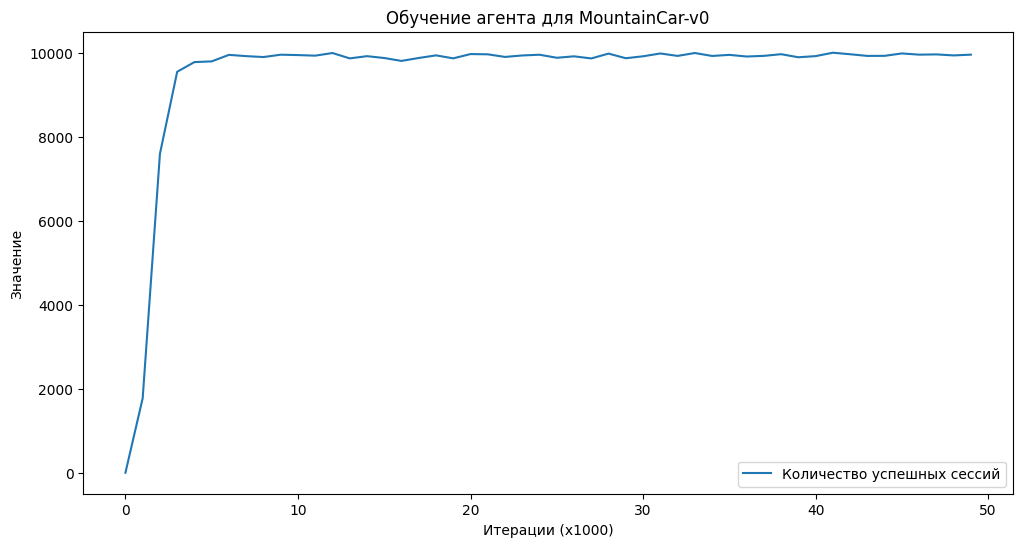

Видео сохранено в папке './videos'.


In [ ]:
## обучение с 500_00 эпизодами

@dataclass
class Config:
    discount: float = 0.99             # Оставляем неизменным
    lr: float = 0.1                    # Начальная скорость обучения
    epsilon: float = 1.0               # Начальное значение epsilon
    final_epsilon: float = 0.05        # Более высокое минимальное epsilon
    n_episodes: int = 500_000          # Количество эпизодов
    print_every: int = 10_000          # Статистика каждые 10,000 эпизодов
    n_bins: int = 50                   # Увеличение количества окон для дискретизации
    max_steps: int = 300               # Оставляем неизменным


class QLearningAgent:
    def __init__(self, env: gym.Env, config: Config) -> None:
        self.env = env
        self.cfg = config

        # Определяем диапазоны наблюдений (min и max)
        self.obs_space_low = self.env.observation_space.low
        self.obs_space_high = self.env.observation_space.high

        # Дискретизация пространства состояний
        self.bins = [
            np.linspace(self.obs_space_low[i], self.obs_space_high[i], self.cfg.n_bins - 1)
            for i in range(self.env.observation_space.shape[0])
        ]

        # Инициализация Q-таблицы
        self.q_table = np.zeros(
            tuple(self.cfg.n_bins for _ in range(self.env.observation_space.shape[0]))
            + (self.env.action_space.n,)
        )

        self.epsilon = self.cfg.epsilon

    def discretize(self, state: np.ndarray) -> tuple:
        """
        Преобразование состояния в дискретную форму.
        """
        return tuple(
            np.digitize(state[i], self.bins[i]) for i in range(len(state))
        )

    def _update_epsilon(self, episode: int) -> None:
        #self.epsilon = self.cfg.final_epsilon + (self.cfg.epsilon - self.cfg.final_epsilon) * np.exp(-0.001 * episode)

        decay_rate = 0.00005
        self.epsilon = max(
            self.cfg.final_epsilon,
            self.cfg.epsilon * np.exp(-decay_rate * episode)
        )


    def get_action(self, state: tuple) -> int:
        """
        Выбор действия по epsilon-greedy политике.
        """
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()  # Случайное действие
        else:
            return np.argmax(self.q_table[state])  # Действие с максимальным Q-значением

    def update_q_table(self, state: tuple, action: int, reward: float, new_state: tuple, done: bool) -> None:
        """
        Обновление Q-таблицы.
        """
        future_reward = 0 if done else np.max(self.q_table[new_state])
        self.q_table[state][action] += self.cfg.lr * (
            reward + self.cfg.discount * future_reward - self.q_table[state][action]
        )

        #dynamic_lr = self.cfg.lr / (1 + 0.0001 * episode)  # Уменьшаем скорость обучения
        #future_reward = 0 if done else np.max(self.q_table[new_state])
        #self.q_table[state][action] += dynamic_lr * (
        #    reward + self.cfg.discount * future_reward - self.q_table[state][action]
        #)


    def run_episode(self, episode: int) -> int:
        """
        Проведение одного эпизода. Возвращает итоговую награду.
        """
        self._update_epsilon(episode)  # Обновление epsilon
        state, _ = self.env.reset()
        state = self.discretize(state)

        total_reward = 0
        for _ in range(self.cfg.max_steps):
            action = self.get_action(state)
            new_state, reward, terminated, truncated, _ = self.env.step(action)
            new_state = self.discretize(new_state)
            done = terminated or truncated

            self.update_q_table(state, action, reward, new_state, done)
            state = new_state
            total_reward += reward

            if done:
                break

        return total_reward

    def train(self):
        """
        Тренировка агента.
        """
        rewards = []  # Награды за эпизоды
        stats = {"avg_rewards": [], "successes": []}  # Статистика

        for ep in tqdm(range(self.cfg.n_episodes)):
            reward = self.run_episode(ep)
            rewards.append(reward)

            # Сбор статистики каждые print_every эпизодов
            if (ep + 1) % self.cfg.print_every == 0:
                avg_reward = np.mean(rewards[-self.cfg.print_every:])
                successes = sum(r > -200 for r in rewards[-self.cfg.print_every:])  # Успех = добраться до вершины
                stats["avg_rewards"].append(avg_reward)
                stats["successes"].append(successes)

                print(f"Эпизод {ep + 1}: Средняя награда: {avg_reward:.2f}, Успехов: {successes}")

        return rewards, stats


# Конфигурация
config = Config()
env = gym.make("MountainCar-v0", render_mode="rgb_array")
agent = QLearningAgent(env, config)

# Тренировка агента
rewards, stats = agent.train()

# Визуализация статистики
plt.figure(figsize=(12, 6))
plt.plot(stats["successes"], label="Количество успешных сессий")
plt.xlabel("Итерации (x1000)")
plt.ylabel("Значение")
plt.legend()
plt.title("Обучение агента для MountainCar-v0")
plt.show()

# Запись видео
from gymnasium.wrappers import RecordVideo

env = RecordVideo(env, video_folder="./videos", episode_trigger=lambda x: x % 1000 == 0)
agent.env = env  # Переключаем на обёрнутую среду

for _ in range(5):  # Играем несколько эпизодов для записи
    agent.run_episode(0)

print("Видео сохранено в папке './videos'.")


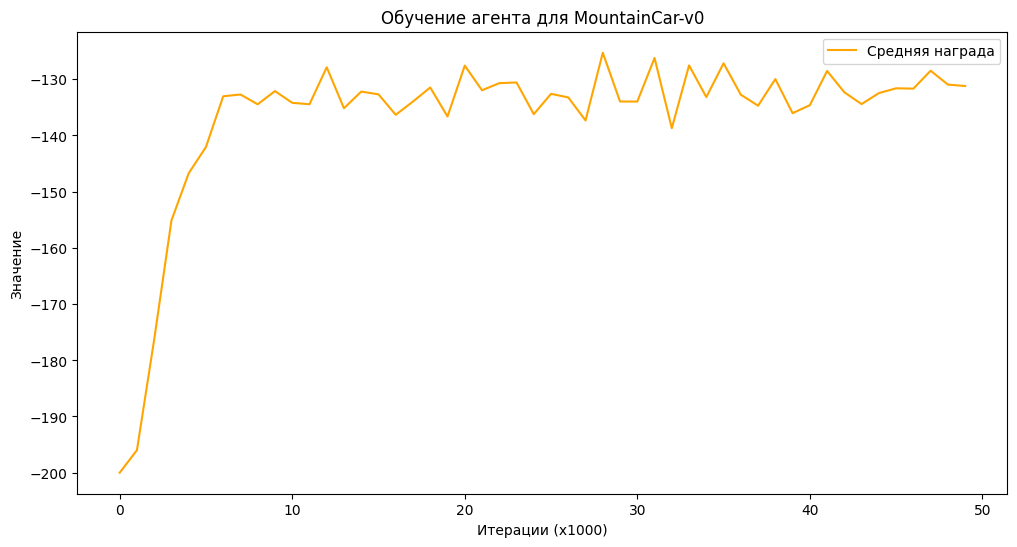

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(stats["avg_rewards"], label="Средняя награда", c = 'orange')
plt.xlabel("Итерации (x1000)")
plt.ylabel("Значение")
plt.legend()
plt.title("Обучение агента для MountainCar-v0")
plt.show()

## Обратная связь
- [ ] Хочу получить обратную связь по решению